In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy as sp
import scipy.stats as stats
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
import sqlite3
import os.path
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules

In [111]:
NBA = pd.read_csv('games_details.csv', low_memory=False)
NBA

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [112]:
WinLoss = pd.read_csv('ranking.csv')
WinLoss

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [113]:
playerDB = pd.read_csv('players.csv')
playerDB

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [114]:
teamDB = pd.read_csv('teams.csv')
teamDB

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [115]:
gameDB = pd.read_csv('games.csv')
gameDB

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [116]:
if not os.path.exists("basketball.db"):
    #Build Database
    conn = sqlite3.connect('basketball.db')
    c = conn.cursor()

    c.execute('''CREATE TABLE players 
                (player_name text, team_id int, player_id int, season int)''')
    
    playerDB.to_sql('players', conn, if_exists='append', index = False)

    c.execute('''CREATE TABLE teams ( league_id int, team_id int, min_year int, max_year int, 
                abbreviation text, nickname text, yearfounded int, city text, 
                arena text, arenacapacity int, owner text, generalmanager text, 
                headcoach text, dleagueaffiliation text)''')
    
    teamDB.to_sql('teams', conn, if_exists='append', index = False)

    c.execute('''CREATE TABLE rankings (team_id int, league_id int, season_id int, 
                standingsdate text, conference text, team text, g int, w int, l int, w_pct real, 
                home_record text, road_record text, returntoplay text)''')
    
    WinLoss.to_sql('rankings', conn, if_exists='append', index = False)

    c.execute('''CREATE TABLE games (game_date_est text, game_id int, game_status_text text, 
                home_team_id int, visitor_team_id int, season int, team_id_home int, pts_home int, 
                fg_pct_home real, ft_pct_home real, fg3_pct_home real, ast_home int, reb_home int, 
                team_id_away int, pts_away int, fg_pct_away real, ft_pct_away real, fg3_pct_away real, 
                ast_away int, reb_away int, home_team_wins int)''')
    
    gameDB.to_sql('games', conn, if_exists='append', index = False)

    c.execute('''CREATE TABLE games_details (game_id int, team_id int, team_abbreviation text, 
                team_city text, player_id int, player_name text, nickname text, start_position text, 
                comment text, min text, fgm int, fga int, fg_pct real, fg3m int, fg3a int, fg3_pct real, 
                ftm int, fta int, ft_pct real, oreb int, dreb int, reb int, ast int, stl int, blk int, [to] 
                int, pf int, pts int, plus_minus int)''')
    
    NBA.to_sql('games_details', conn, if_exists='append', index = False)


    c.execute('''CREATE VIEW game_wins as SELECT game_id, CASE WHEN games.home_team_wins = 1 
                THEN home_team_id ELSE visitor_team_id END AS team_id FROM games''')

    c.execute('''CREATE VIEW player_wins AS SELECT games_details.game_id, games_details.team_id, 
                games_details.player_id, games_details.player_name, game_wins.team_id AS winning_team 
                FROM games_details LEFT JOIN game_wins ON games_details.game_id = game_wins.game_id 
                AND games_details.team_id = game_wins.team_id''')
    
    df_game_wins = pd.read_sql_query('''SELECT * FROM game_wins''', conn)
    df_player_wins = pd.read_sql_query('''SELECT * FROM player_wins''', conn)
    
else:
    conn = sqlite3.connect('basketball.db')
    
    df_game_wins = pd.read_sql_query('''SELECT * FROM game_wins''', conn)
    df_player_wins = pd.read_sql_query('''SELECT * FROM player_wins''', conn)

In [117]:
display(df_game_wins)
display(df_player_wins)

,game_id,team_id
0,22101005,1610612750
1,22101006,1610612741
2,22101007,1610612754
3,22101008,1610612744
4,22101009,1610612761
...,...,...
25791,11400007,1610612737
25792,11400004,1610612764
25793,11400005,1610612747
25794,11400002,1610612761


,game_id,team_id,player_id,player_name,winning_team
0,22101005,1610612750,1630162,Anthony Edwards,1.610613e+09
1,22101005,1610612750,1630183,Jaden McDaniels,1.610613e+09
2,22101005,1610612750,1626157,Karl-Anthony Towns,1.610613e+09
3,22101005,1610612750,1627736,Malik Beasley,1.610613e+09
4,22101005,1610612750,1626156,D'Angelo Russell,1.610613e+09
...,...,...,...,...,...
646410,11200005,1610612743,202706,Jordan Hamilton,1.610613e+09
646411,11200005,1610612743,202702,Kenneth Faried,1.610613e+09
646412,11200005,1610612743,201585,Kosta Koufos,1.610613e+09
646413,11200005,1610612743,202389,Timofey Mozgov,1.610613e+09


In [118]:
team_names = teamDB.groupby(['TEAM_ID'])
team_names = team_names['NICKNAME'].apply(''.join)

team_names

TEAM_ID
1610612737            Hawks
1610612738          Celtics
1610612739        Cavaliers
1610612740         Pelicans
1610612741            Bulls
1610612742        Mavericks
1610612743          Nuggets
1610612744         Warriors
1610612745          Rockets
1610612746         Clippers
1610612747           Lakers
1610612748             Heat
1610612749            Bucks
1610612750     Timberwolves
1610612751             Nets
1610612752           Knicks
1610612753            Magic
1610612754           Pacers
1610612755            76ers
1610612756             Suns
1610612757    Trail Blazers
1610612758            Kings
1610612759            Spurs
1610612760          Thunder
1610612761          Raptors
1610612762             Jazz
1610612763        Grizzlies
1610612764          Wizards
1610612765          Pistons
1610612766          Hornets
Name: NICKNAME, dtype: object

In [119]:
team_city = NBA.groupby(['TEAM_ID'])
team_city = team_city['TEAM_CITY'].unique()

team_city

TEAM_ID
1610612737                                   [Atlanta]
1610612738                                    [Boston]
1610612739                                 [Cleveland]
1610612740    [New Orleans, New Orleans/Oklahoma City]
1610612741                                   [Chicago]
1610612742                                    [Dallas]
1610612743                                    [Denver]
1610612744                              [Golden State]
1610612745                                   [Houston]
1610612746                           [LA, Los Angeles]
1610612747                               [Los Angeles]
1610612748                                     [Miami]
1610612749                                 [Milwaukee]
1610612750                                 [Minnesota]
1610612751                      [Brooklyn, New Jersey]
1610612752                                  [New York]
1610612753                                   [Orlando]
1610612754                                   [Indiana]
16

In [120]:
team_record = WinLoss.groupby(['SEASON_ID', 'TEAM_ID'])

win_record = team_record['W'].max()
win_record = win_record.loc[12005 : 22021]
win_record = win_record.unstack()
win_record = win_record.sum()
win_record = win_record.astype(int)

win_record

TEAM_ID
1610612737     786
1610612738     953
1610612739     817
1610612740     779
1610612741     853
1610612742     999
1610612743     933
1610612744     927
1610612745     968
1610612746     871
1610612747     887
1610612748     939
1610612749     808
1610612750     691
1610612751     759
1610612752     684
1610612753     770
1610612754     891
1610612755     773
1610612756     872
1610612757     870
1610612758     720
1610612759    1104
1610612760     885
1610612761     861
1610612762     933
1610612763     849
1610612764     742
1610612765     821
1610612766     616
dtype: int32

In [121]:
loss_record = team_record['L'].max()
loss_record = loss_record.loc[12005 : 22021]
loss_record = loss_record.unstack()
loss_record = loss_record.sum()
loss_record = loss_record.astype(int)

loss_record

TEAM_ID
1610612737    903
1610612738    742
1610612739    870
1610612740    912
1610612741    840
1610612742    702
1610612743    766
1610612744    759
1610612745    727
1610612746    826
1610612747    816
1610612748    763
1610612749    887
1610612750    996
1610612751    925
1610612752    995
1610612753    930
1610612754    800
1610612755    916
1610612756    821
1610612757    825
1610612758    976
1610612759    585
1610612760    801
1610612761    833
1610612762    763
1610612763    853
1610612764    953
1610612765    872
1610612766    914
dtype: int32

In [122]:
defeat = df_player_wins['winning_team'].isnull()
victory = -defeat
victory = victory.astype(int)

victory

0         1
1         1
2         1
3         1
4         1
         ..
646410    1
646411    1
646412    1
646413    1
646414    1
Name: winning_team, Length: 646415, dtype: int32

In [123]:
clean_league = NBA.drop(
    [
        'GAME_ID',
        #'PLAYER_ID',
        'PLUS_MINUS',
        'PTS'
    ],
    
    axis = 1
)

clean_league.insert(loc = 7, column = 'WIN', value = victory)
clean_league.insert(loc = 8, column = 'PTS', value = NBA['PTS'])
clean_league.insert(loc = 9, column = 'PLUS_MINUS', value = NBA['PLUS_MINUS'])

clean_league

,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,WIN,PTS,PLUS_MINUS,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
0,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,1,15.0,5.0,...,4.0,1.000,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0
1,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,1,14.0,10.0,...,1.0,1.000,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0
2,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,1,15.0,14.0,...,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0
3,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,1,12.0,20.0,...,0.0,0.000,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0
4,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,1,14.0,17.0,...,7.0,1.000,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,1,17.0,NaN,...,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0
645949,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,1,18.0,NaN,...,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0
645950,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,1,6.0,NaN,...,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0
645951,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,1,2.0,NaN,...,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0


In [124]:
teams = clean_league.groupby(['TEAM_ID'])

teams = teams.sum()
teams = teams.drop(columns = ['PLAYER_ID', 'WIN'])

teams['NAME'] = team_names
teams.insert(loc = 0, column = 'CITY', value = team_city)

teams.insert(loc = 1, column = 'WINS', value = win_record)
teams.insert(loc = 2, column = 'LOSSES', value = loss_record)

total_games = win_record + loss_record
teams.insert(loc = 3, column = 'WIN_PCT', value = win_record / total_games)

opponent_points = teams['PTS'] - teams['PLUS_MINUS']
teams.insert(loc = 5, column = 'OPP_PTS', value = opponent_points)

teams = teams.sort_values(by = ['WIN_PCT'], ascending = False)
teams = teams.set_index('NAME')

teams

,CITY,WINS,LOSSES,WIN_PCT,PTS,OPP_PTS,PLUS_MINUS,FGM,FGA,FG_PCT,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
NAME,,,,,,,,,,,,,,,,,,,,,
Spurs,[San Antonio],1104,585,0.653641,185112.0,143043.0,42069.0,69779.0,149301.0,8715.635,...,40889.0,8226.724,18069.0,59707.0,77776.0,41503.0,13167.0,9354.0,23529.0,34844.0
Mavericks,[Dallas],999,702,0.587302,179862.0,162305.0,17557.0,66387.0,145523.0,7954.002,...,40697.0,8330.019,18298.0,56366.0,74664.0,38217.0,12819.0,8267.0,22278.0,35961.0
Rockets,[Houston],968,727,0.571091,180016.0,164319.0,15697.0,64645.0,143966.0,7285.753,...,43550.0,7518.013,18716.0,56349.0,75065.0,37452.0,13647.0,8145.0,24969.0,36687.0
Celtics,[Boston],953,742,0.562242,182816.0,163669.0,19147.0,67529.0,147678.0,8078.226,...,42663.0,8481.491,17971.0,57778.0,75749.0,40930.0,14461.0,8567.0,25605.0,39671.0
Heat,[Miami],939,763,0.551704,182296.0,165221.0,17075.0,67449.0,145593.0,7787.307,...,44051.0,7748.052,17613.0,58117.0,75730.0,38798.0,13708.0,9153.0,24880.0,38017.0
Jazz,[Utah],933,763,0.550118,173165.0,160202.0,12963.0,63776.0,138229.0,7768.609,...,43650.0,8199.440,19277.0,53988.0,73265.0,38495.0,12964.0,8739.0,24609.0,37957.0
Warriors,[Golden State],927,759,0.549822,186796.0,167619.0,19177.0,69410.0,149486.0,8012.467,...,40403.0,7964.949,18464.0,56896.0,75360.0,42891.0,14572.0,9381.0,25180.0,37980.0
Nuggets,[Denver],933,766,0.549147,183097.0,169667.0,13430.0,67501.0,145977.0,7668.608,...,45516.0,8250.727,19764.0,55859.0,75623.0,41028.0,14052.0,8815.0,24847.0,37200.0
Pacers,[Indiana],891,800,0.526907,174237.0,167522.0,6715.0,64418.0,143494.0,7586.200,...,41140.0,8279.782,18376.0,56233.0,74609.0,37382.0,13305.0,9023.0,24428.0,37204.0


<AxesSubplot:xlabel='NAME'>

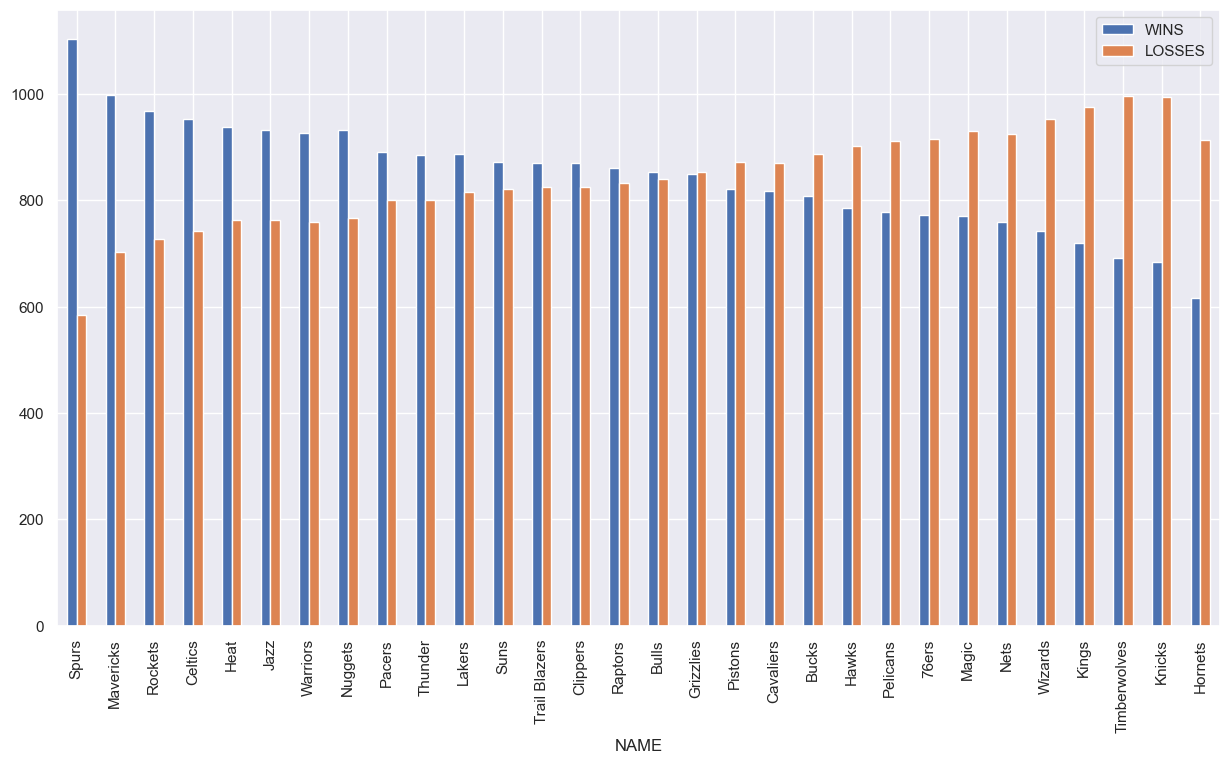

In [125]:
teams[['WINS', 'LOSSES']].plot(kind='bar', figsize=(15, 8))

<AxesSubplot:xlabel='NAME'>

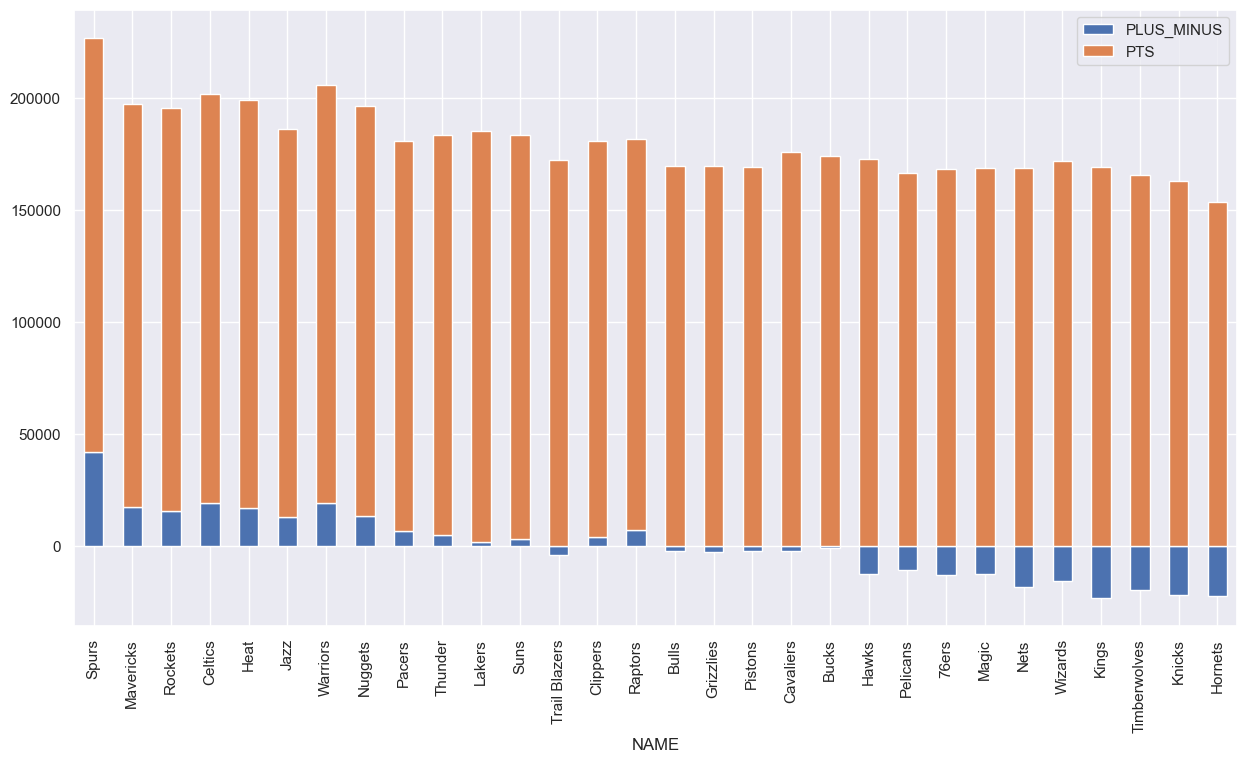

In [126]:
teams[['PLUS_MINUS', 'PTS']].plot(kind='bar', stacked=True, figsize=(15, 8))

<AxesSubplot:xlabel='NAME'>

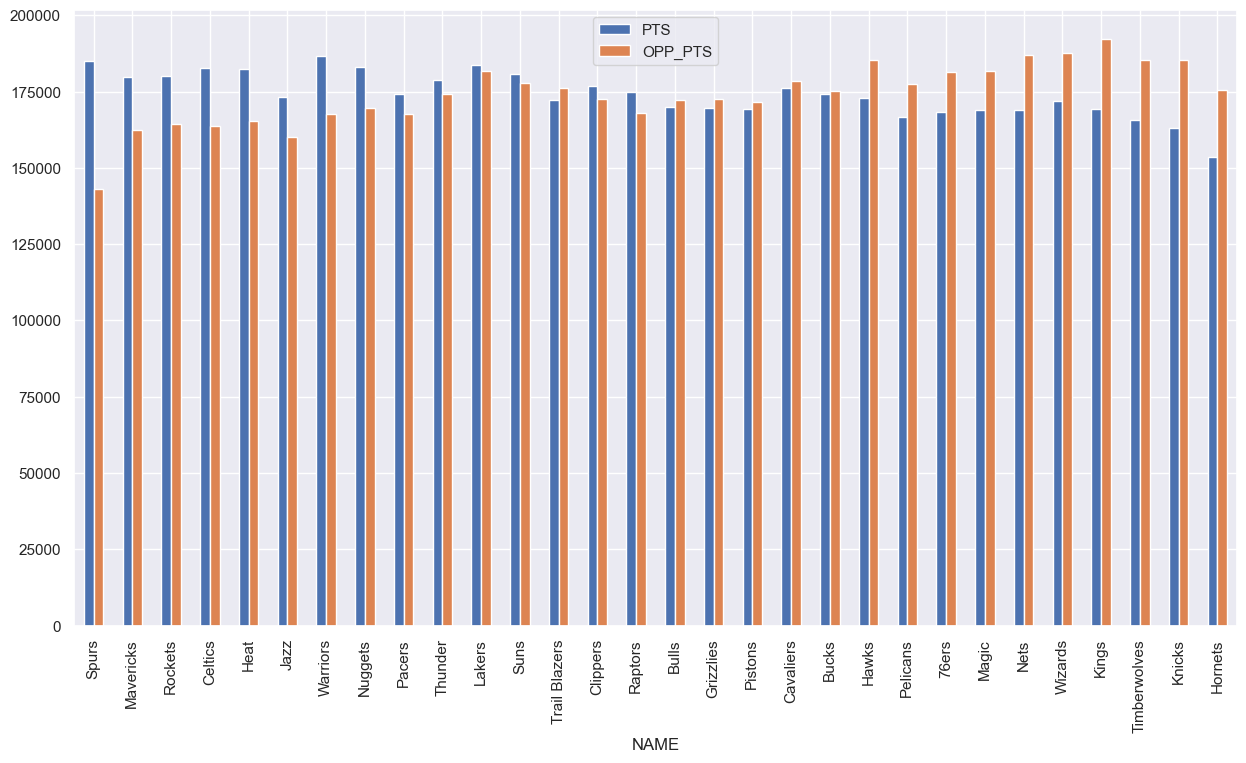

In [127]:
teams[['PTS', 'OPP_PTS']].plot(kind='bar', figsize=(15, 8))

In [128]:
players = clean_league.drop(columns = ['PLAYER_ID', 'TEAM_ID'])
players = players.groupby(['PLAYER_NAME'])
games_played = players['MIN'].count()

playerSum = players.sum()
playerSum.insert(loc = 0, column = 'GAMES_PLAYED', value = games_played)

playerSum

,GAMES_PLAYED,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.J. Guyton,1,0,4.0,0.0,0.0,4.0,0.000,0.0,2.0,0.000,...,4.0,1.000,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0
A.J. Lawson,1,0,8.0,-6.0,2.0,3.0,0.667,2.0,2.0,1.000,...,2.0,1.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0
AJ Hammons,29,31,82.0,2.0,34.0,76.0,8.924,5.0,12.0,3.833,...,20.0,3.750,14.0,46.0,60.0,7.0,1.0,16.0,14.0,34.0
AJ Price,301,213,1832.0,-55.0,655.0,1686.0,103.594,267.0,805.0,77.867,...,343.0,96.154,83.0,352.0,435.0,647.0,143.0,9.0,279.0,289.0
Aamir Simms,2,4,4.0,6.0,1.0,2.0,1.000,0.0,0.0,0.000,...,2.0,1.000,3.0,2.0,5.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,92,49,2357.0,175.0,908.0,1494.0,57.090,17.0,55.0,12.500,...,767.0,62.348,245.0,394.0,639.0,289.0,81.0,49.0,242.0,192.0
Zoran Dragic,17,33,28.0,-15.0,11.0,33.0,1.362,3.0,15.0,0.429,...,5.0,2.000,5.0,4.0,9.0,5.0,2.0,0.0,5.0,6.0
Zoran Planinic,169,105,651.0,-199.0,225.0,553.0,53.642,40.0,144.0,28.234,...,240.0,47.778,53.0,170.0,223.0,189.0,68.0,7.0,137.0,264.0


In [129]:
PlusMinSum = playerSum.sort_values(by = ['PLUS_MINUS'], ascending = False)
top20Sum = PlusMinSum.iloc[:20]
top20Sum

,GAMES_PLAYED,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
LeBron James,1703,894,45683.0,8512.0,16612.0,33053.0,857.181,2599.0,7552.0,513.676,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Tim Duncan,1170,602,20177.0,6509.0,7908.0,15722.0,589.629,18.0,105.0,16.500,...,6326.0,756.594,2983.0,8817.0,11800.0,3355.0,808.0,2286.0,2433.0,2563.0
Stephen Curry,1008,555,24334.0,6432.0,8290.0,17625.0,469.650,3776.0,8917.0,416.990,...,4391.0,793.049,680.0,4010.0,4690.0,6434.0,1671.0,241.0,3185.0,2428.0
Manu Ginobili,1235,635,16803.0,6104.0,5440.0,12243.0,533.788,1798.0,4907.0,415.361,...,4982.0,848.319,788.0,3682.0,4470.0,4786.0,1595.0,370.0,2572.0,2655.0
Chris Paul,1363,780,24529.0,5977.0,8668.0,18364.0,632.781,1830.0,4956.0,449.276,...,6184.0,1043.314,851.0,5262.0,6113.0,12632.0,2848.0,202.0,3311.0,3368.0
Tony Parker,1345,697,21612.0,5558.0,8663.0,17639.0,637.715,474.0,1498.0,239.378,...,5071.0,816.169,484.0,3190.0,3674.0,7519.0,1094.0,105.0,3162.0,2143.0
Kevin Durant,1139,576,30706.0,5095.0,10486.0,21302.0,569.506,2168.0,5692.0,434.980,...,8605.0,978.440,806.0,7237.0,8043.0,4708.0,1238.0,1254.0,3525.0,2263.0
Draymond Green,843,446,7715.0,4877.0,2792.0,6383.0,347.998,746.0,2367.0,211.389,...,1940.0,396.192,992.0,5087.0,6079.0,4573.0,1191.0,912.0,1908.0,2479.0
Dirk Nowitzki,1330,649,27927.0,4833.0,9908.0,21014.0,625.729,1552.0,4100.0,441.192,...,7376.0,1047.120,1219.0,8715.0,9934.0,3213.0,997.0,1068.0,2175.0,2997.0


<AxesSubplot:xlabel='PLAYER_NAME'>

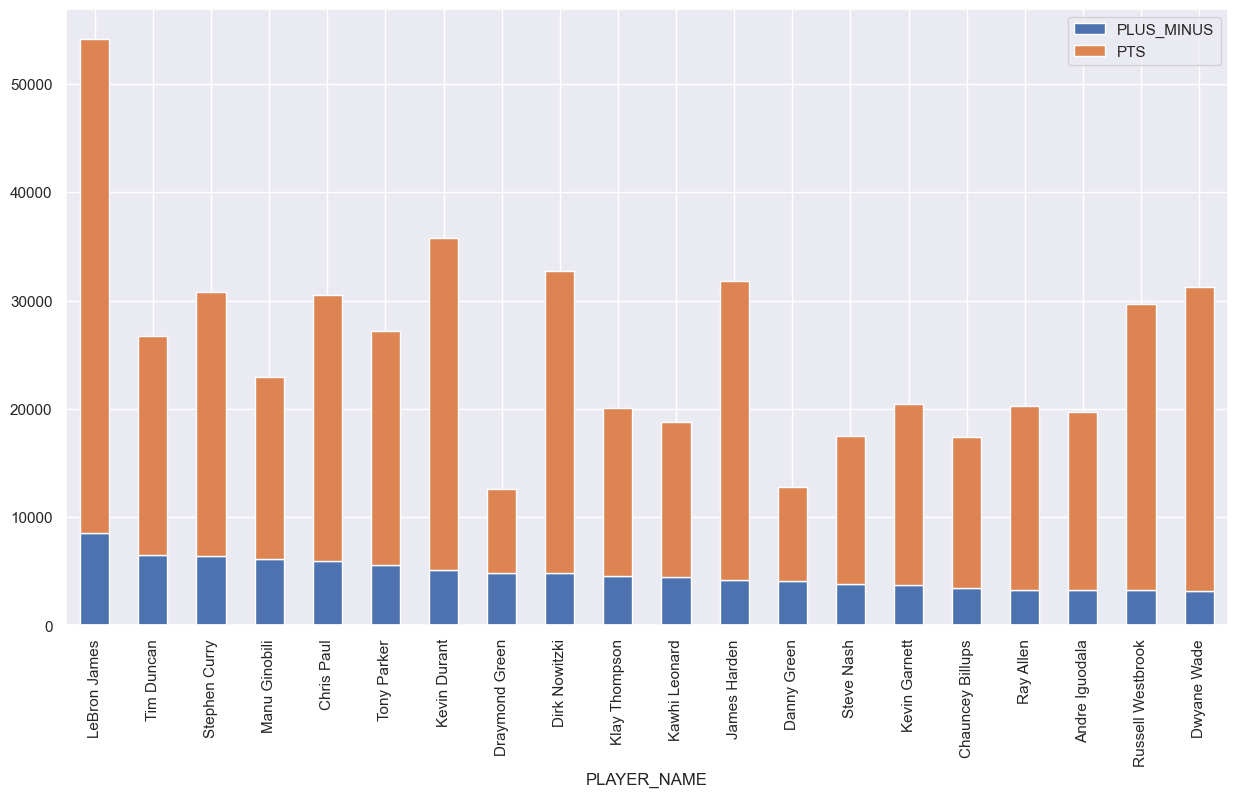

In [130]:
top20Sum[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [131]:
WinSum = playerSum.sort_values(by = ['WIN'], ascending = False)
top20WinSum = WinSum.iloc[:20]
top20WinSum

,GAMES_PLAYED,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
LeBron James,1703,894,45683.0,8512.0,16612.0,33053.0,857.181,2599.0,7552.0,513.676,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Udonis Haslem,1073,878,7819.0,472.0,3157.0,6452.0,481.587,6.0,67.0,5.500,...,1994.0,459.946,1927.0,5012.0,6939.0,858.0,507.0,306.0,992.0,2590.0
Dwight Howard,1434,803,22371.0,2912.0,8082.0,13802.0,834.721,22.0,108.0,18.666,...,10963.0,762.598,4774.0,11969.0,16743.0,1917.0,1254.0,2617.0,3846.0,4622.0
Chris Paul,1363,780,24529.0,5977.0,8668.0,18364.0,632.781,1830.0,4956.0,449.276,...,6184.0,1043.314,851.0,5262.0,6113.0,12632.0,2848.0,202.0,3311.0,3368.0
Andre Iguodala,1480,773,16394.0,3276.0,5905.0,12835.0,677.406,1322.0,3966.0,423.276,...,4680.0,692.715,1350.0,5807.0,7157.0,6015.0,2098.0,746.0,2644.0,2657.0
Kyle Korver,1458,769,13925.0,3167.0,4771.0,10844.0,616.331,2856.0,6719.0,593.599,...,1733.0,609.370,396.0,3828.0,4224.0,2408.0,933.0,484.0,1530.0,2948.0
Carmelo Anthony,1417,750,31526.0,1160.0,11231.0,25283.0,623.445,1910.0,5393.0,429.519,...,8782.0,1050.053,2215.0,6513.0,8728.0,3802.0,1403.0,705.0,3460.0,4026.0
Vince Carter,1382,725,20404.0,1182.0,7221.0,16852.0,561.858,2046.0,5586.0,443.885,...,4871.0,780.968,1171.0,4386.0,5557.0,3921.0,1241.0,601.0,2163.0,3456.0
Paul Millsap,1294,724,16947.0,2830.0,6323.0,13051.0,611.858,641.0,1930.0,205.005,...,4994.0,773.025,2771.0,6274.0,9045.0,2733.0,1546.0,1231.0,2168.0,3851.0


<AxesSubplot:xlabel='PLAYER_NAME'>

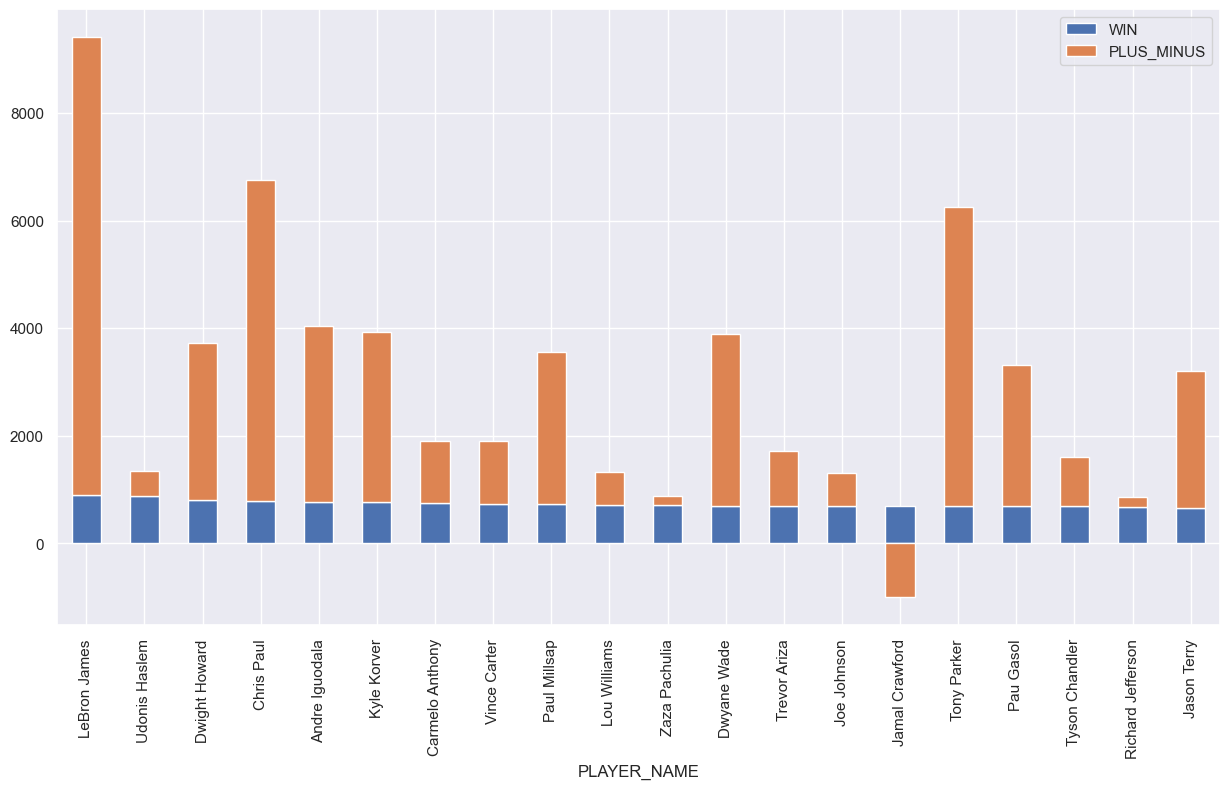

In [132]:
top20WinSum[['WIN', 'PLUS_MINUS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [133]:
leagueAvg = playerSum['GAMES_PLAYED'].mean()

playerAvg = players.mean()
playerAvg = playerAvg.fillna(0)

playerAvg = playerAvg.loc[
    playerSum['GAMES_PLAYED'] > leagueAvg
]

playerAvg

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,
AJ Price,0.513253,6.086379,-0.200000,2.176080,5.601329,0.344166,0.887043,2.674419,0.258694,0.847176,1.139535,0.319449,0.275748,1.169435,1.445183,2.149502,0.475083,0.029900,0.926910,0.960133
Aaron Brooks,0.497722,9.598118,-0.470922,3.458333,8.373656,0.378718,1.236559,3.379032,0.307013,1.444892,1.731183,0.458988,0.384409,1.275538,1.659946,2.899194,0.537634,0.134409,1.533602,1.877688
Aaron Gordon,0.509061,12.786972,-0.397887,4.836268,10.656690,0.448171,1.095070,3.399648,0.281278,2.019366,2.910211,0.524752,1.586268,4.625000,6.211268,2.436620,0.739437,0.607394,1.478873,1.985915
Aaron Gray,0.546448,3.445682,-1.101227,1.389972,2.727019,0.405376,0.000000,0.008357,0.000000,0.665738,1.147632,0.230362,1.334262,2.470752,3.805014,0.629526,0.303621,0.303621,0.877437,2.222841
Aaron Holiday,0.464744,7.465385,0.496154,2.746154,6.565385,0.412508,0.988462,2.638462,0.331673,0.984615,1.180769,0.345254,0.242308,1.469231,1.711538,2.315385,0.642308,0.215385,1.107692,1.592308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yogi Ferrell,0.513120,7.580420,-0.594406,2.727273,6.468531,0.396839,1.108392,2.989510,0.311325,1.017483,1.227273,0.370626,0.269231,1.734266,2.003497,2.279720,0.615385,0.101399,0.842657,1.335664
Zach LaVine,0.559615,19.307540,-2.930556,6.944444,15.031746,0.446490,2.103175,5.420635,0.344829,3.315476,4.009921,0.680837,0.472222,3.446429,3.918651,3.746032,0.882937,0.311508,2.680556,2.117063
Zach Randolph,0.481722,17.432599,-0.255792,6.943612,14.839648,0.466712,0.194714,0.712775,0.098984,3.350661,4.392070,0.656183,3.043172,6.545374,9.588546,1.956828,0.784141,0.285463,2.185903,2.505727


In [134]:
PlusMinAvg = playerAvg.sort_values(by = ['PLUS_MINUS'], ascending = False)
top20Avg = PlusMinAvg.iloc[:20]
top20Avg

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,
Stephen Curry,0.531609,24.140873,6.563265,8.224206,17.485119,0.465923,3.746032,8.846230,0.413681,3.946429,4.356151,0.786755,0.674603,3.978175,4.652778,6.382937,1.657738,0.239087,3.159722,2.408730
Kawhi Leonard,0.512563,19.266129,6.030014,6.903226,13.989247,0.493667,1.518817,3.956989,0.359573,3.940860,4.626344,0.706953,1.303763,5.279570,6.583333,2.862903,1.736559,0.630376,1.654570,1.799731
Draymond Green,0.506243,9.151839,5.861779,3.311981,7.571767,0.412809,0.884935,2.807829,0.250758,1.642942,2.301305,0.469979,1.176750,6.034401,7.211151,5.424674,1.412811,1.081851,2.263345,2.940688
Klay Thompson,0.518029,19.299751,5.795685,7.235075,15.850746,0.452822,2.922886,6.990050,0.404254,1.906716,2.251244,0.556122,0.456468,3.063433,3.519900,2.312189,0.916667,0.547264,1.717662,2.194030
Tim Duncan,0.497521,17.245299,5.770390,6.758974,13.437607,0.503956,0.015385,0.089744,0.014103,3.711966,5.406838,0.646662,2.549573,7.535897,10.085470,2.867521,0.690598,1.953846,2.079487,2.190598
Joel Embiid,0.508274,24.967213,5.524590,8.155738,16.844262,0.481642,1.128415,3.467213,0.314795,7.527322,9.292350,0.796385,2.265027,8.748634,11.013661,3.153005,0.830601,1.614754,3.349727,3.122951
LeBron James,0.508822,26.825015,5.155663,9.754551,19.408691,0.503336,1.526130,4.434527,0.301630,5.789783,7.876688,0.717019,1.194950,6.359953,7.554903,7.200822,1.581327,0.776277,3.482090,1.887258
Manu Ginobili,0.491486,13.605668,5.090909,4.404858,9.913360,0.432217,1.455870,3.973279,0.336325,3.340081,4.034008,0.686898,0.638057,2.981377,3.619433,3.875304,1.291498,0.299595,2.082591,2.149798
Steve Nash,0.510438,15.501131,4.636253,5.676471,11.296380,0.501587,1.418552,3.335973,0.391799,2.729638,3.000000,0.739534,0.487557,2.805430,3.292986,10.073529,0.692308,0.110860,3.334842,1.477376


<AxesSubplot:xlabel='PLAYER_NAME'>

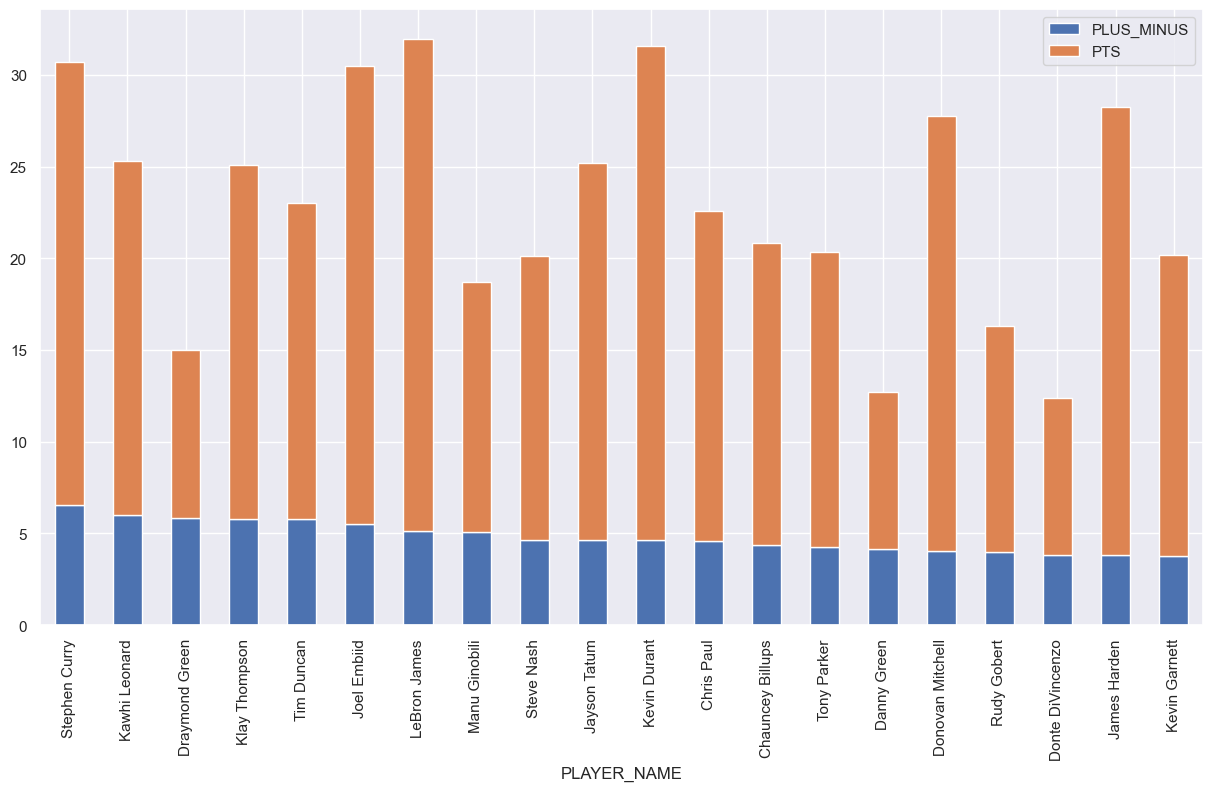

In [135]:
top20Avg[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [136]:
WinAvg = playerAvg.sort_values(by = ['WIN'], ascending = False)
top20WinAvg = WinAvg.iloc[:20]
top20WinAvg

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,
Cameron Johnson,0.641921,10.220657,2.375587,3.516432,7.793427,0.450117,2.089202,5.183099,0.413211,1.098592,1.276995,0.432474,0.666667,2.826291,3.492958,1.281690,0.732394,0.262911,0.624413,1.521127
Mikal Bridges,0.624625,10.993958,1.918429,4.135952,8.232628,0.495710,1.380665,3.725076,0.320912,1.341390,1.604230,0.466541,0.876133,3.033233,3.909366,2.018127,1.283988,0.601208,0.861027,2.060423
Landry Shamet,0.602649,8.513699,1.616438,2.780822,6.856164,0.387158,1.900685,4.924658,0.365469,1.051370,1.246575,0.406428,0.202055,1.609589,1.811644,1.568493,0.479452,0.143836,0.705479,1.808219
Frank Ntilikina,0.585890,5.209386,-1.223827,1.949458,5.324910,0.324040,0.700361,2.133574,0.266968,0.610108,0.787004,0.234116,0.335740,1.527076,1.862816,2.342960,0.736462,0.231047,1.137184,2.046931
Deandre Ayton,0.580537,15.890152,1.113636,6.992424,11.590909,0.608947,0.056818,0.223485,0.043561,1.848485,2.458333,0.541640,3.117424,7.318182,10.435606,1.549242,0.731061,1.056818,1.696970,2.787879
Jimmer Fredette,0.574586,6.267176,-1.388000,2.259542,5.458015,0.364206,0.866412,2.248092,0.287183,0.881679,1.026718,0.335615,0.225191,0.847328,1.072519,1.423664,0.416031,0.045802,0.980916,0.927481
Nemanja Bjelica,0.568421,7.618257,-0.130705,2.827801,6.134855,0.440438,1.132780,2.939834,0.340515,0.829876,1.091286,0.330884,1.066390,3.446058,4.512448,1.780083,0.655602,0.406639,1.031120,2.321577
Jaren Jackson Jr.,0.568182,15.530233,0.088372,5.469767,12.055814,0.454149,1.683721,4.776744,0.328326,2.906977,3.720930,0.657633,1.320930,3.813953,5.134884,1.167442,0.865116,1.706977,1.674419,3.818605
Royce O'Neale,0.568075,6.356968,3.080685,2.286064,5.000000,0.439553,1.168704,3.012225,0.339296,0.616137,0.792176,0.258318,0.611247,4.193154,4.804401,2.061125,0.816626,0.364303,0.968215,2.352078


<AxesSubplot:xlabel='PLAYER_NAME'>

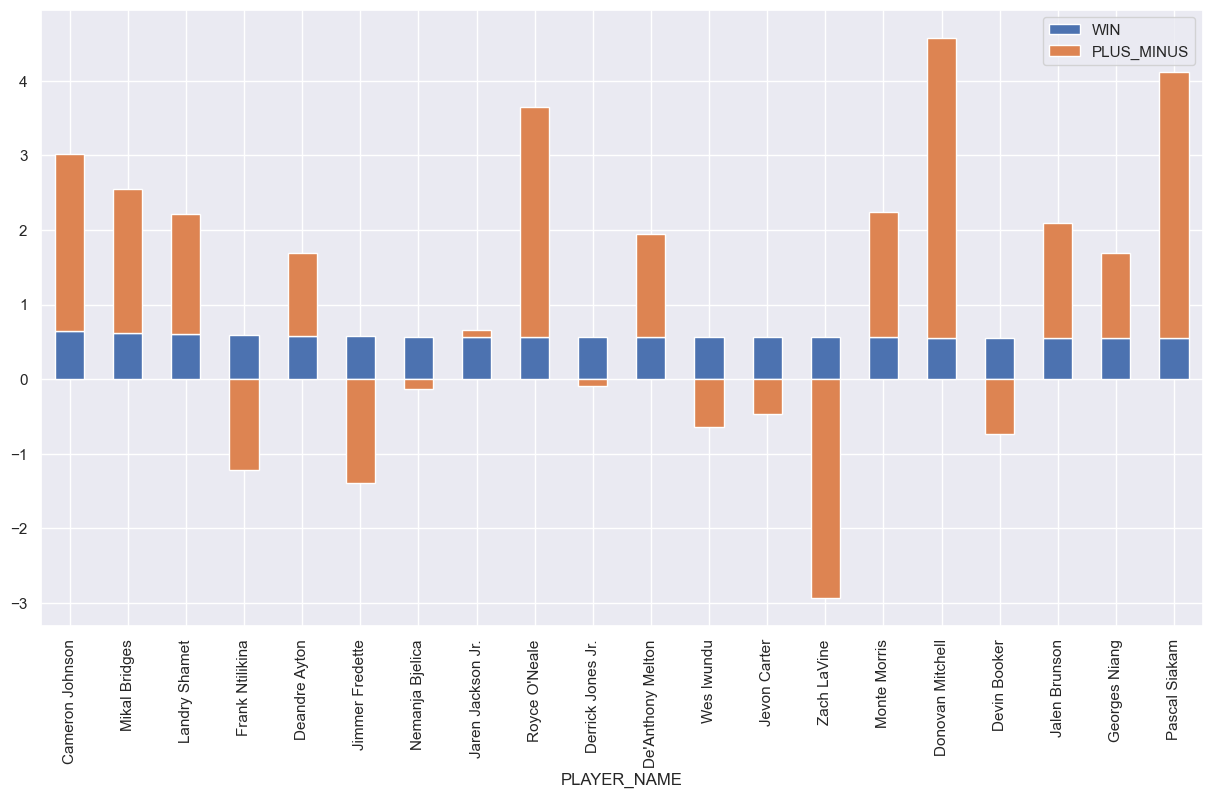

In [137]:
top20WinAvg[['WIN', 'PLUS_MINUS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [138]:
corr_matrix = clean_league.drop(columns = ['TEAM_ID', 'PLAYER_ID'])
corr_matrix = corr_matrix.corr()
corr_matrix.sort_values(by = 'WIN', ascending = False)

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
WIN,1.000000,0.004421,0.029042,0.004206,-0.000589,0.006684,0.005066,-0.000930,0.004044,0.001706,0.000250,0.002329,-0.002620,0.004079,0.002092,0.002562,-0.000280,0.000071,-0.001784,-0.001253
PLUS_MINUS,0.029042,0.204389,1.000000,0.196867,0.094922,0.191512,0.157843,0.077233,0.137900,0.112862,0.103394,0.098484,0.042987,0.175194,0.152283,0.170968,0.122468,0.089076,-0.016157,0.012890
FG_PCT,0.006684,0.444453,0.191512,0.496714,0.209148,1.000000,0.208262,0.035220,0.297069,0.137355,0.155894,0.159967,0.149460,0.210866,0.222597,0.091089,0.101102,0.131282,0.125848,0.174778
FG3M,0.005066,0.554851,0.157843,0.478217,0.457543,0.208262,1.000000,0.821595,0.722485,0.153433,0.122881,0.154254,-0.112408,0.092210,0.025946,0.252139,0.159082,-0.054619,0.163513,0.075584
PTS,0.004421,1.000000,0.204389,0.960353,0.881684,0.444453,0.554851,0.514154,0.372936,0.668489,0.654966,0.508810,0.243506,0.442952,0.439300,0.430077,0.306815,0.161626,0.415912,0.271850
FGM,0.004206,0.960353,0.196867,1.000000,0.884617,0.496714,0.478217,0.441318,0.320417,0.470505,0.477921,0.381143,0.272387,0.445859,0.453140,0.401419,0.292207,0.176022,0.392979,0.269415
DREB,0.004079,0.442952,0.175194,0.445859,0.445862,0.210866,0.092210,0.109980,0.025086,0.322914,0.358980,0.255081,0.394507,1.000000,0.929412,0.214525,0.176729,0.328532,0.293864,0.283766
FG3_PCT,0.004044,0.372936,0.137900,0.320417,0.248435,0.297069,0.722485,0.457253,1.000000,0.079709,0.054109,0.098014,-0.128059,0.025086,-0.032090,0.182306,0.109315,-0.073288,0.099052,0.034666
AST,0.002562,0.430077,0.170968,0.401419,0.471379,0.091089,0.252139,0.328359,0.182306,0.310344,0.297364,0.250880,0.002095,0.214525,0.166234,1.000000,0.296455,-0.002456,0.388286,0.129855
FT_PCT,0.002329,0.508810,0.098484,0.381143,0.410235,0.159967,0.154254,0.193238,0.098014,0.682592,0.596241,1.000000,0.151373,0.255081,0.257454,0.250880,0.182931,0.095681,0.250054,0.190102


<AxesSubplot:>

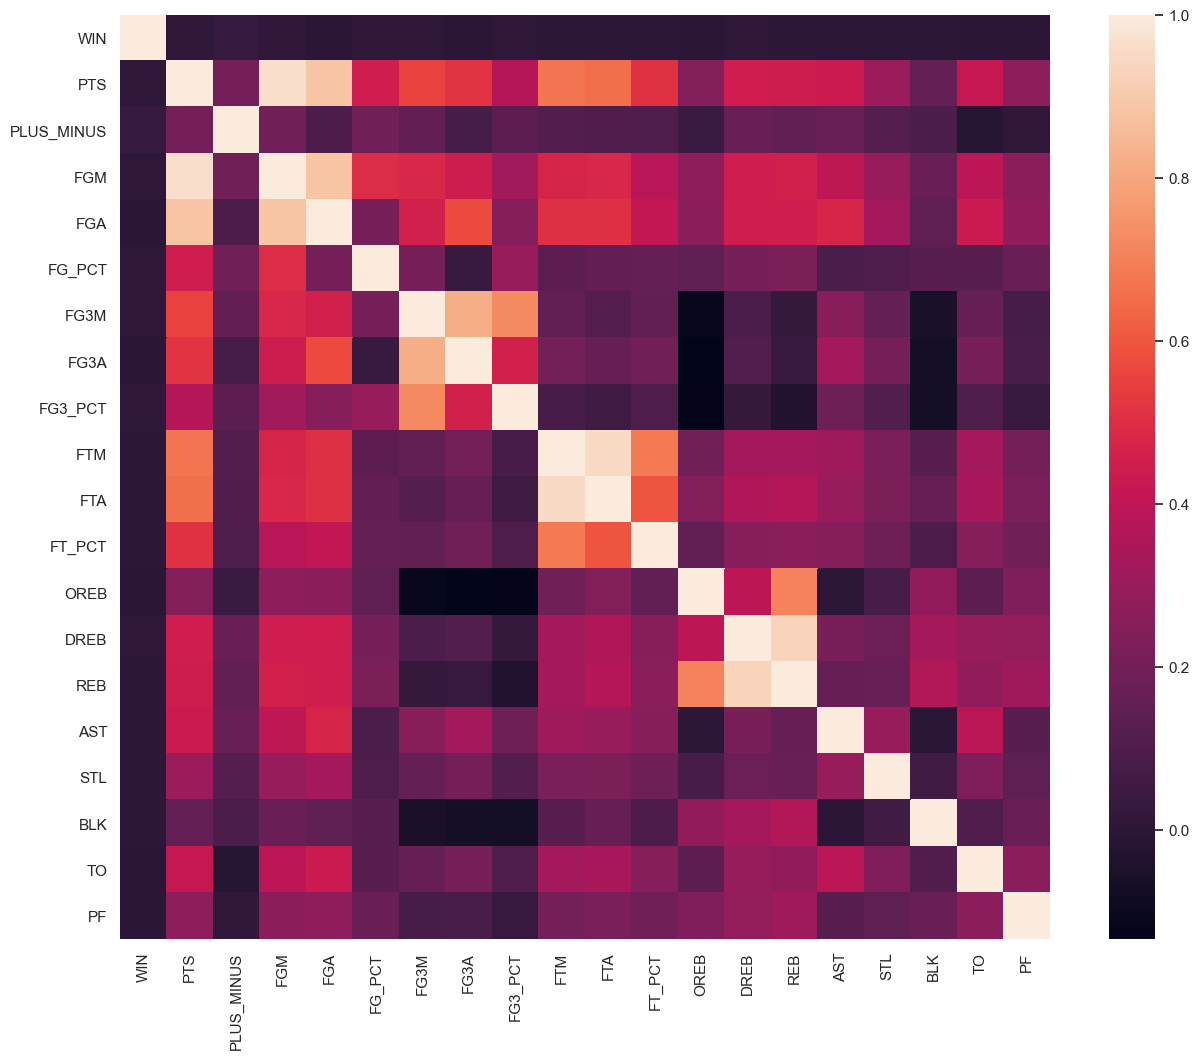

In [139]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix)

In [140]:
win_matrix = teams.corr()
win_matrix.sort_values(by = 'WIN_PCT', ascending = False)

,WINS,LOSSES,WIN_PCT,PTS,OPP_PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
WIN_PCT,0.993905,-0.983850,1.000000,0.832353,-0.877728,0.976211,0.808763,0.781370,0.874684,0.607228,...,0.493951,0.661153,0.242617,0.854948,0.815707,0.702062,0.514505,0.753114,0.443651,0.566041
WINS,1.000000,-0.958197,0.993905,0.857367,-0.841846,0.964561,0.837408,0.813154,0.882168,0.606012,...,0.514733,0.664547,0.286085,0.870434,0.842929,0.710747,0.537996,0.741470,0.485132,0.611836
PLUS_MINUS,0.964561,-0.969076,0.976211,0.831227,-0.914682,1.000000,0.816291,0.775174,0.880619,0.599988,...,0.478301,0.644432,0.195340,0.843562,0.790811,0.736062,0.550885,0.766583,0.425486,0.577192
FG_PCT,0.882168,-0.837807,0.874684,0.839845,-0.727077,0.880619,0.869759,0.821337,1.000000,0.458424,...,0.480275,0.739765,0.196386,0.855745,0.801667,0.796255,0.574303,0.724443,0.492873,0.599185
DREB,0.870434,-0.806504,0.854948,0.889773,-0.634489,0.843562,0.879461,0.903771,0.855745,0.626945,...,0.565272,0.545837,0.277189,1.000000,0.952001,0.759989,0.550761,0.731330,0.671193,0.645096
PTS,0.857367,-0.769316,0.832353,1.000000,-0.535615,0.831227,0.975712,0.946416,0.839845,0.710220,...,0.628110,0.579279,0.307332,0.889773,0.866401,0.832197,0.686213,0.666347,0.705637,0.746576
REB,0.842929,-0.749084,0.815707,0.866401,-0.571352,0.790811,0.861897,0.920245,0.801667,0.528713,...,0.627684,0.538493,0.557984,0.952001,1.000000,0.715640,0.561516,0.741827,0.694701,0.656248
FGM,0.837408,-0.739744,0.808763,0.975712,-0.530584,0.816291,1.000000,0.961444,0.869759,0.602977,...,0.531538,0.593853,0.321150,0.879461,0.861897,0.861918,0.674760,0.695181,0.662613,0.687265
FGA,0.813154,-0.707599,0.781370,0.946416,-0.489427,0.775174,0.961444,1.000000,0.821337,0.618355,...,0.519130,0.570973,0.438393,0.903771,0.920245,0.807312,0.664068,0.678203,0.668331,0.682827
FG3_PCT,0.793371,-0.735296,0.779421,0.821495,-0.573940,0.771022,0.814187,0.797937,0.804863,0.699365,...,0.321475,0.583617,0.039152,0.816855,0.717987,0.665245,0.370250,0.491039,0.431321,0.488125


<AxesSubplot:>

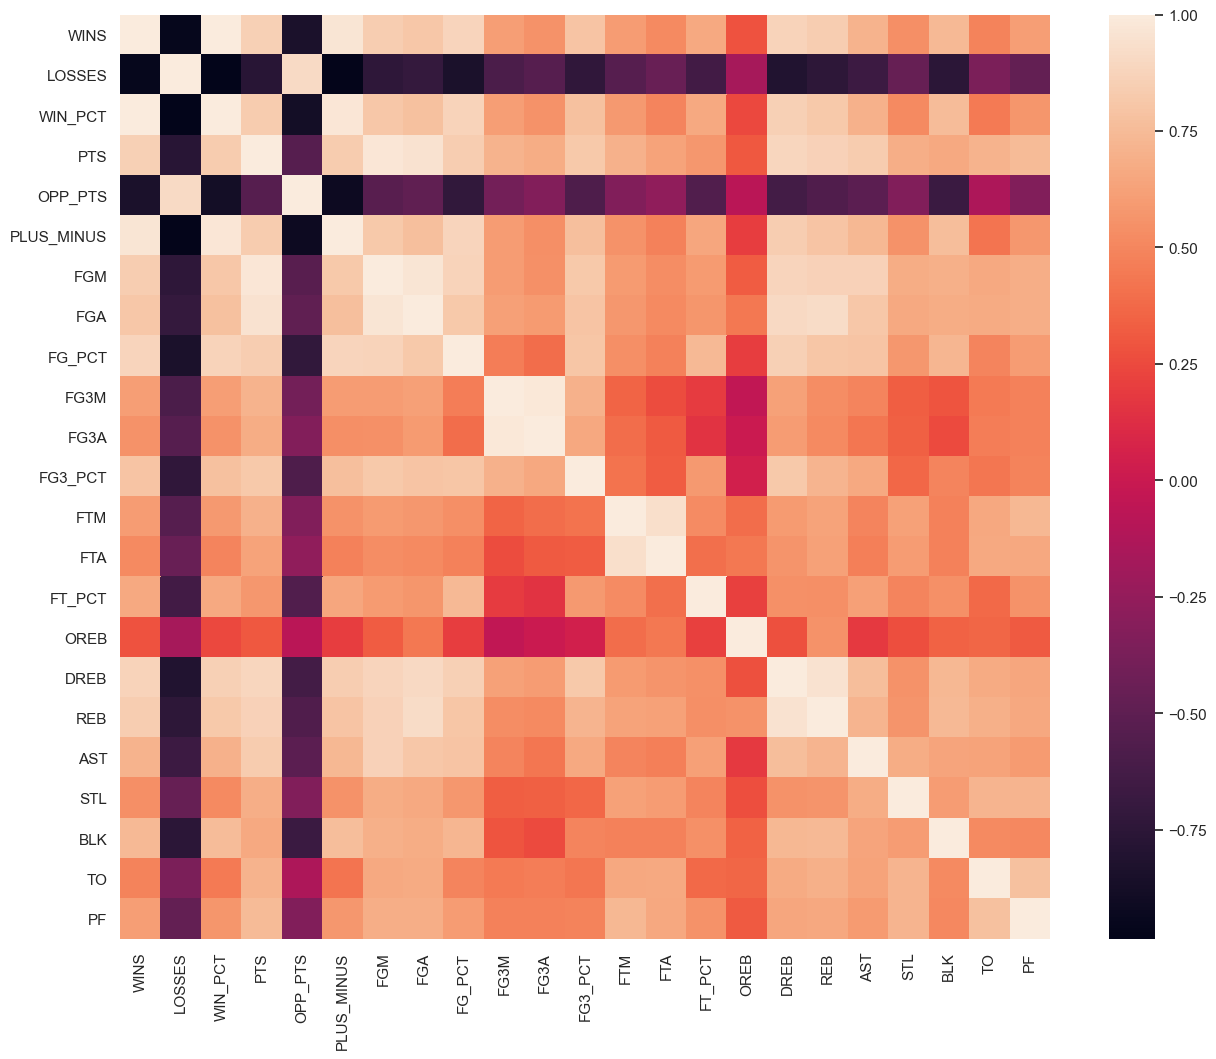

In [141]:
plt.figure(figsize = (15, 12))
sns.heatmap(win_matrix)

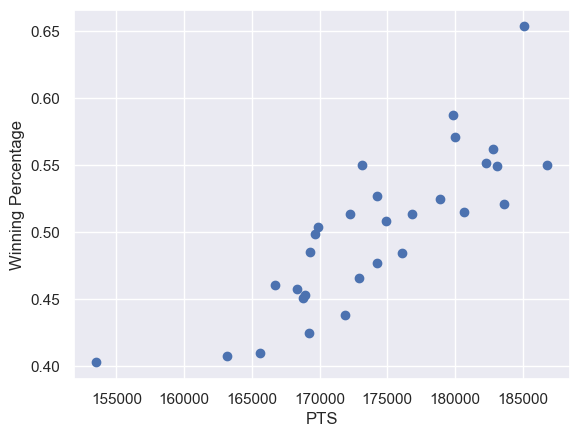

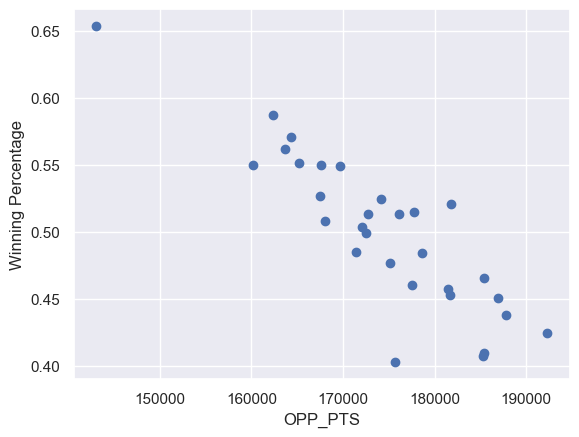

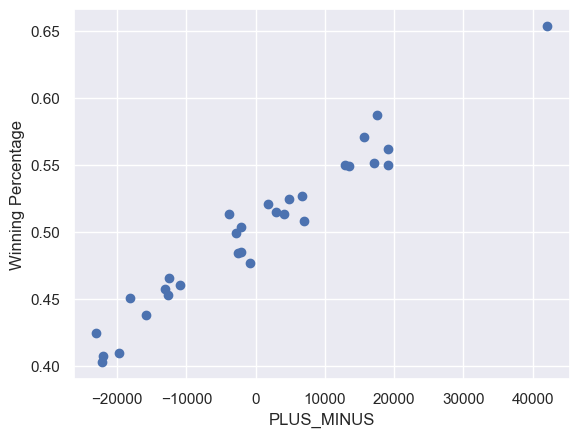

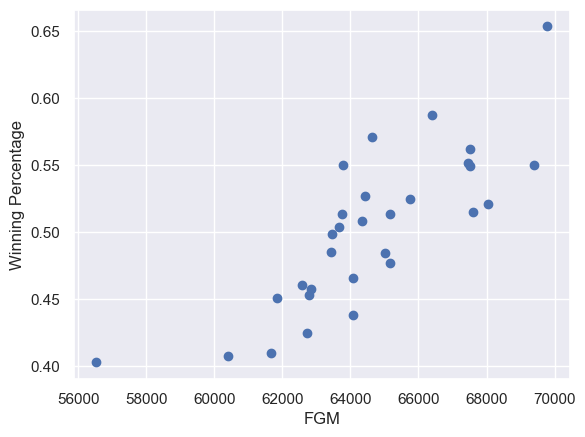

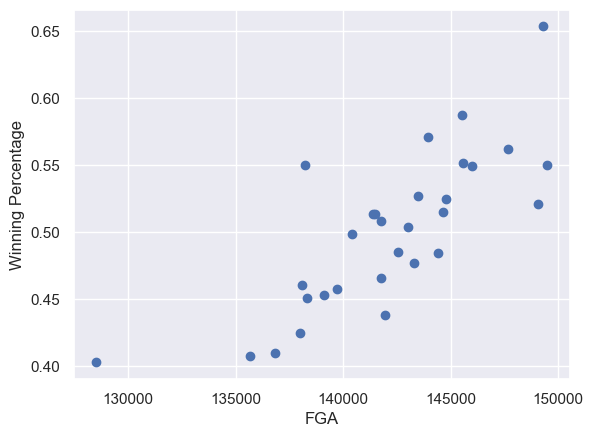

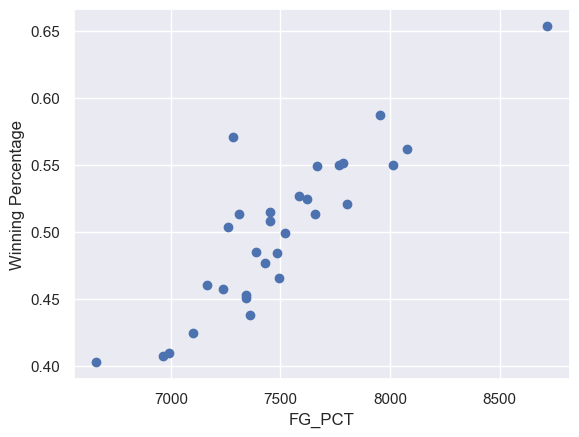

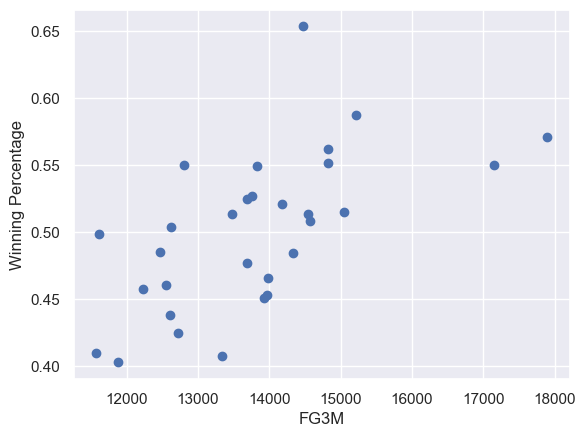

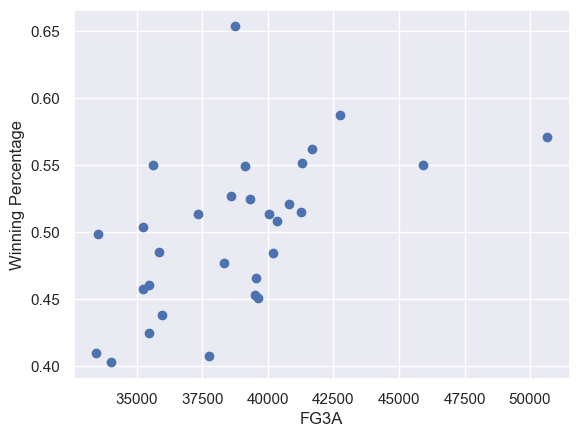

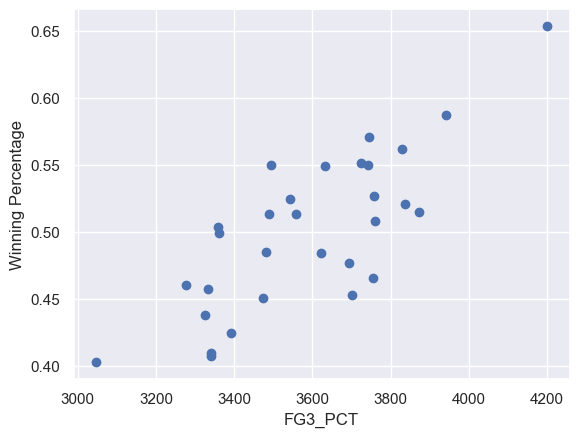

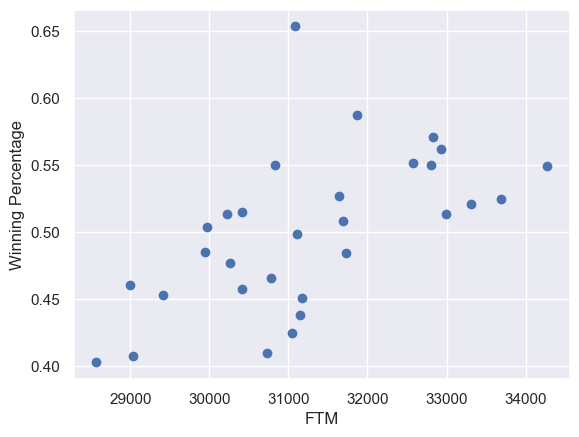

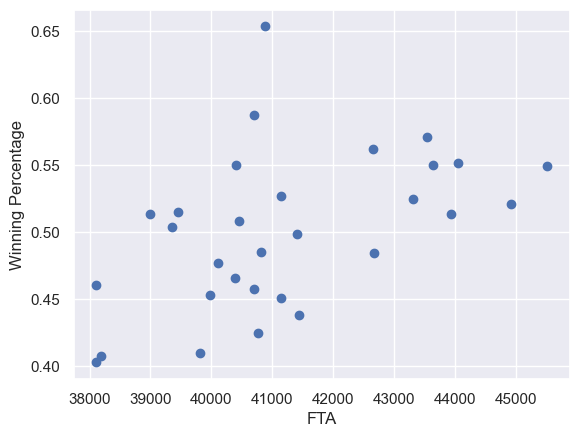

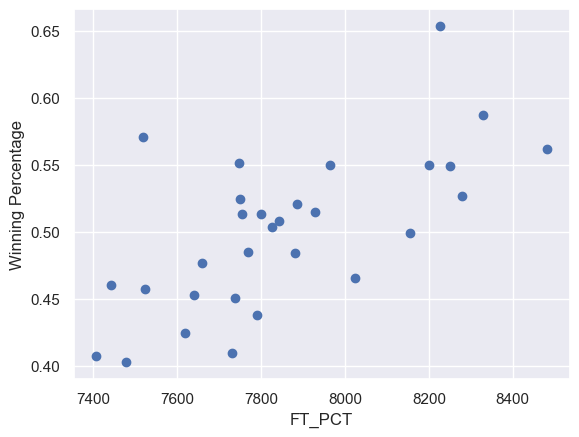

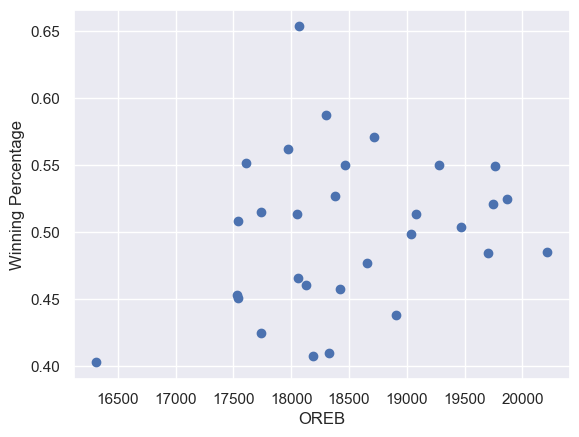

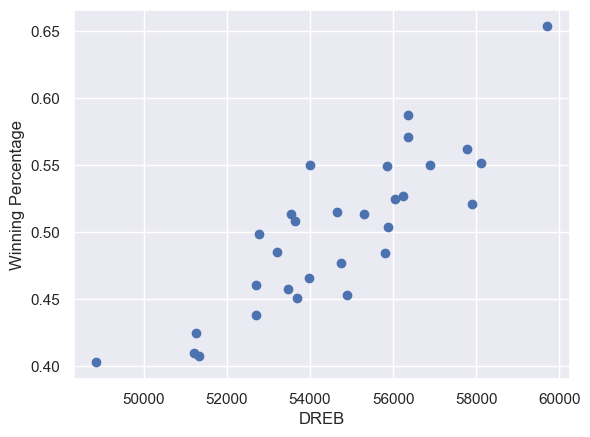

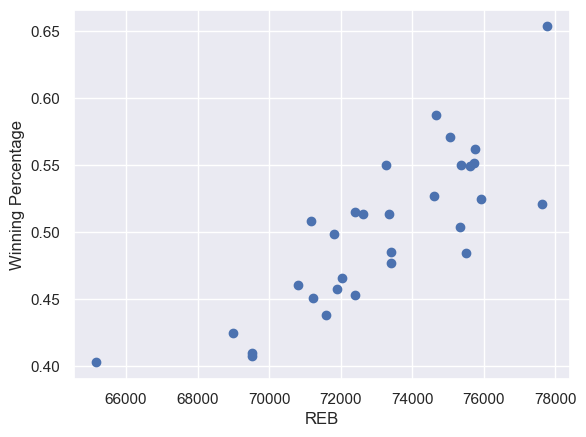

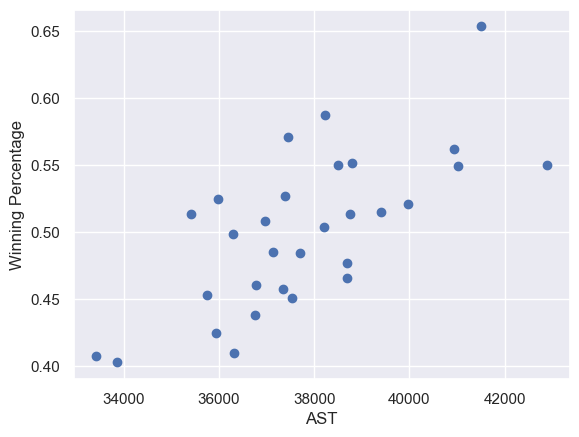

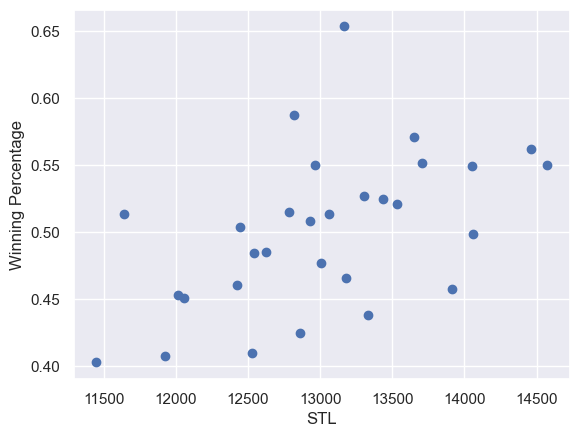

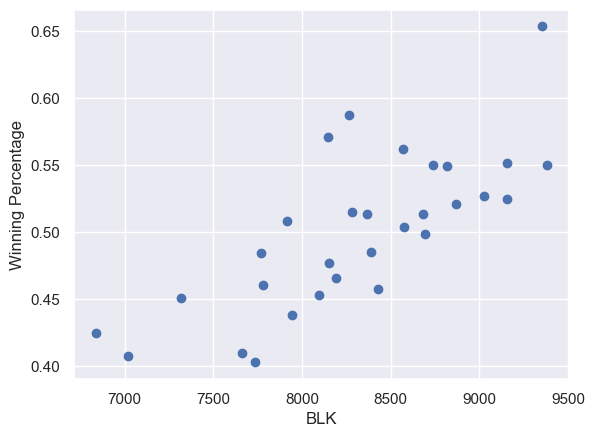

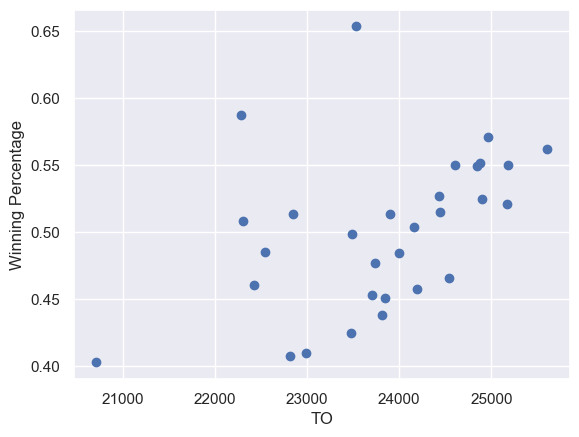

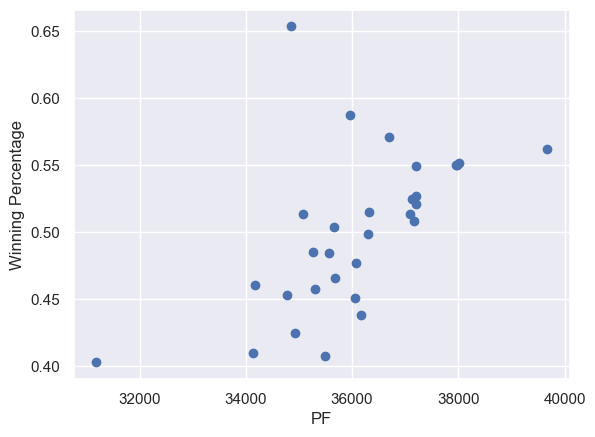

In [142]:
statsNBA = teams.iloc[:, 4:]

for col in statsNBA:
    plt.scatter(teams[col], teams['WIN_PCT'])
    plt.xlabel(col)
    plt.ylabel("Winning Percentage")
    plt.show()

In [143]:
basket = NBA.groupby(['GAME_ID', 'PLAYER_NAME'])
basket = basket['MIN']
basket = basket.count()
basket = basket.unstack()
basket = basket.reset_index()
basket = basket.fillna(0)
basket = basket.set_index('GAME_ID')

basket

PLAYER_NAME,A.J. Guyton,A.J. Lawson,AJ Hammons,AJ Price,Aamir Simms,Aaron Brooks,Aaron Craft,Aaron Gordon,Aaron Gray,Aaron Harrison,...,Zeljko Rebraca,Zendon Hamilton,Zhaire Smith,Zhou Qi,Ziaire Williams,Zion Williamson,Zoran Dragic,Zoran Planinic,Zydrunas Ilgauskas,Zylan Cheatham
GAME_ID,,,,,,,,,,,,,,,,,,,,,
10300001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10300004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
frequent_players = apriori(
    basket.astype(bool), 
    min_support = 0.03, 
    use_colnames = True
)

frequent_players.sort_values(by = 'support', ascending = False)

,support,itemsets
111,0.066308,(LeBron James)
8,0.057620,(Andre Iguodala)
107,0.056802,(Kyle Korver)
53,0.055867,(Dwight Howard)
25,0.055205,(Carmelo Anthony)
...,...,...
6,0.030154,(Anderson Varejao)
105,0.030115,(Kosta Koufos)
160,0.030115,(Roy Hibbert)
7,0.030076,(Andre Drummond)


In [145]:
sport_association = association_rules(
    frequent_players, 
    metric = 'confidence',
    min_threshold = 0.6
)

sport_association.sort_values(by = 'support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Manu Ginobili),(Tony Parker),0.048114,0.052400,0.042426,0.881781,16.827929,0.039905,8.015659
5,(Tony Parker),(Manu Ginobili),0.052400,0.048114,0.042426,0.809665,16.827929,0.039905,5.001118
8,(Tim Duncan),(Tony Parker),0.045582,0.052400,0.041530,0.911111,17.387658,0.039142,10.660501
9,(Tony Parker),(Tim Duncan),0.052400,0.045582,0.041530,0.792565,17.387658,0.039142,4.601047
2,(Manu Ginobili),(Tim Duncan),0.048114,0.045582,0.039037,0.811336,17.799464,0.036844,5.058825
3,(Tim Duncan),(Manu Ginobili),0.045582,0.048114,0.039037,0.856410,17.799464,0.036844,6.629203
10,"(Manu Ginobili, Tim Duncan)",(Tony Parker),0.039037,0.052400,0.035686,0.914172,17.446065,0.033641,11.040643
11,"(Manu Ginobili, Tony Parker)",(Tim Duncan),0.042426,0.045582,0.035686,0.841139,18.453288,0.033753,6.007868
12,"(Tim Duncan, Tony Parker)",(Manu Ginobili),0.041530,0.048114,0.035686,0.859287,17.859255,0.033688,6.764734
13,(Manu Ginobili),"(Tim Duncan, Tony Parker)",0.048114,0.041530,0.035686,0.741700,17.859255,0.033688,3.710690


In [146]:
model_PlusMin = smf.ols(
    formula='WIN_PCT ~ PLUS_MINUS', 
    data = teams
).fit()

model_PlusMin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WIN_PCT   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     567.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.94e-20
Time:                        15:26:12   Log-Likelihood:                 89.049
No. Observations:                  30   AIC:                            -174.1
Df Residuals:                      28   BIC:                            -171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5005      0.002    213.000      0.000       0.496       0.505
PLUS_MINUS  3.673e-06   1.54e-07     23.824      0.000    3.36e-06    3.99e-06
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.579
Skew:                           0.087   Prob(JB):                        0.749
Kurtosis:                       2.342   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
predictors = []
top_preds = []
r2 = []

simpReg = pd.DataFrame()
equation = 'WIN_PCT ~ '

for col in statsNBA:
    algorithm = equation + col
    model = smf.ols(formula = algorithm, data = teams).fit()

    predictors.append(col)
    r2.append(model.rsquared)
    
simpReg['Predictor'] = predictors
simpReg['R-Squared'] = r2
simpReg = simpReg.sort_values('R-Squared', ascending = False)

top_preds.append(simpReg['Predictor'].iloc[0])
equation += top_preds[0]

simpReg

,Predictor,R-Squared
2,PLUS_MINUS,0.952988
1,OPP_PTS,0.770407
5,FG_PCT,0.765072
13,DREB,0.730936
0,PTS,0.692811
14,REB,0.665378
3,FGM,0.654097
4,FGA,0.610539
8,FG3_PCT,0.607497
17,BLK,0.567180


Text(0, 0.5, 'Winning Percentage')

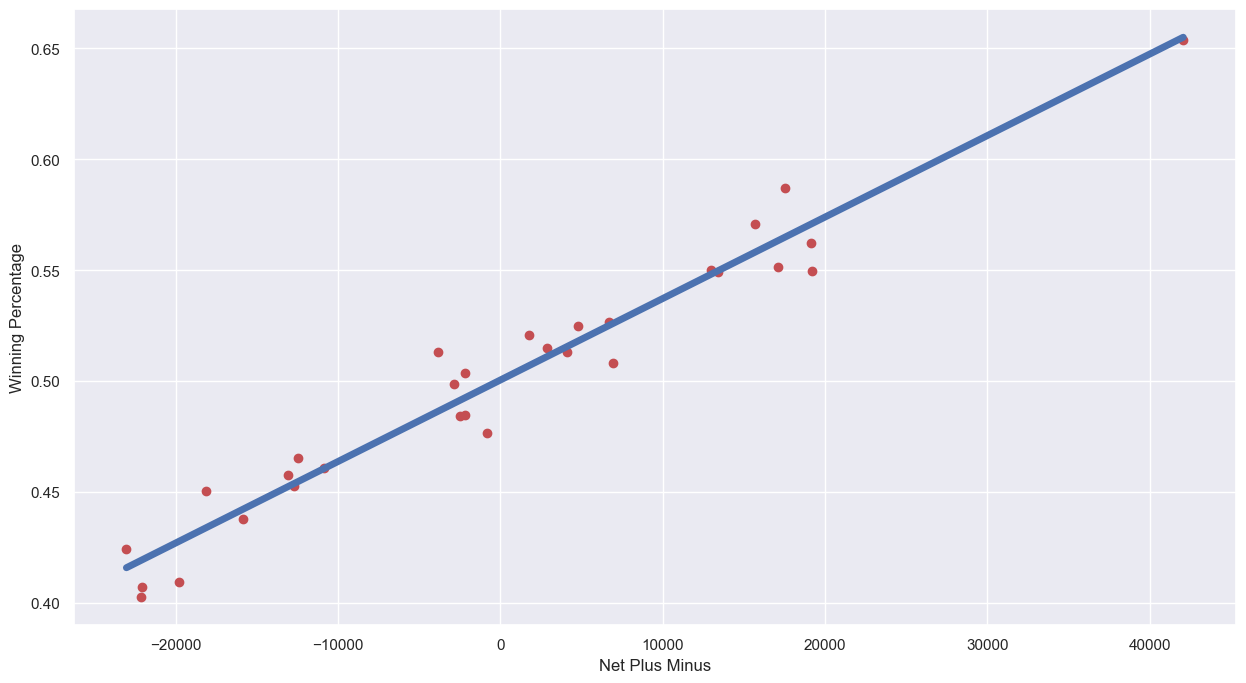

In [148]:
x = teams['PLUS_MINUS']
y = teams['WIN_PCT']
beta0, beta1 = model_PlusMin.params

plt.figure(figsize=(15,8))
plt.plot(x, y, 'ro')

xticks = np.linspace(x.min(), x.max())
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)

plt.xlabel('Net Plus Minus')
plt.ylabel('Winning Percentage')

In [149]:
def MultiLine():
    predictors = []
    r2 = []
    reg = pd.DataFrame()

    for col in statsNBA:
        algorithm = equation + ' * ' + col
        model = smf.ols(formula = algorithm, data = teams).fit()

        predictors.append(col)
        r2.append(model.rsquared_adj)

    reg['Predictor'] = predictors
    reg['R-Squared'] = r2
    reg = reg.sort_values('R-Squared', ascending = False)

    return reg

In [150]:
formulas = [equation]

multiReg = pd.DataFrame(columns = ['Predictor', 'R-Squared'])
multiReg.loc[multiReg.shape[0]] = simpReg.iloc[0]

for i in range(6):
    reg = MultiLine()
    
    top_preds.append(reg['Predictor'].iloc[0])
    equation += ' * ' + top_preds[-1]
    
    formulas.append(equation)
    multiReg.loc[multiReg.shape[0]] = reg.iloc[0]

multiReg

,Predictor,R-Squared
0,PLUS_MINUS,0.952988
1,TO,0.959726
2,OREB,0.963213
3,BLK,0.965880
4,FT_PCT,0.969181
5,FTA,0.969452
6,STL,0.999994


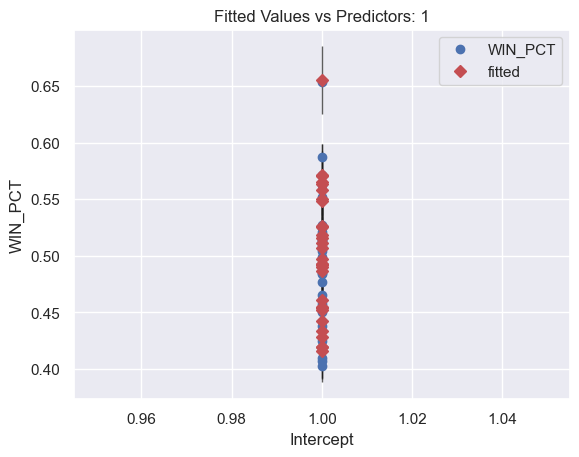

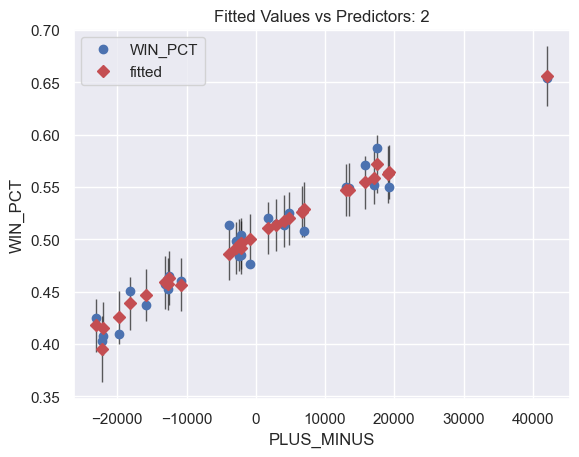

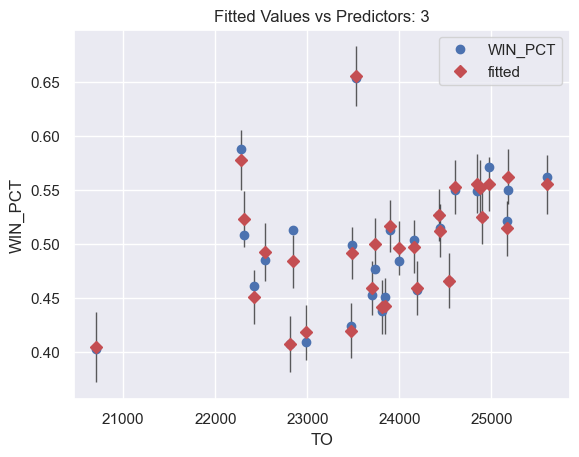

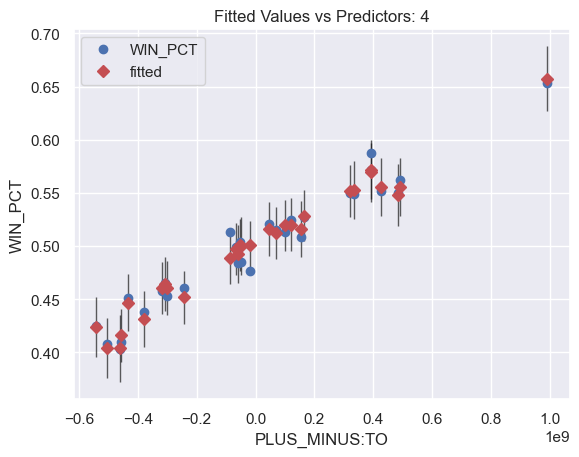

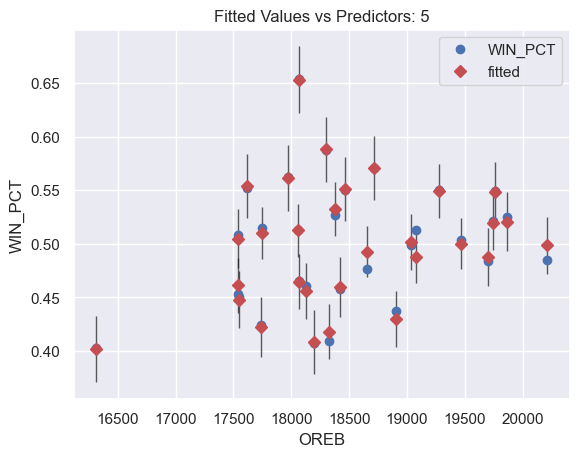

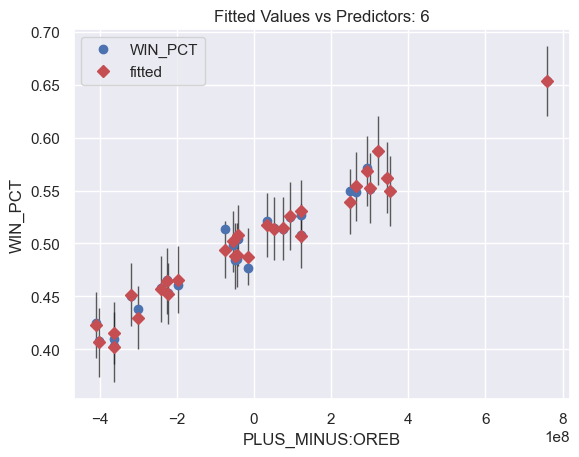

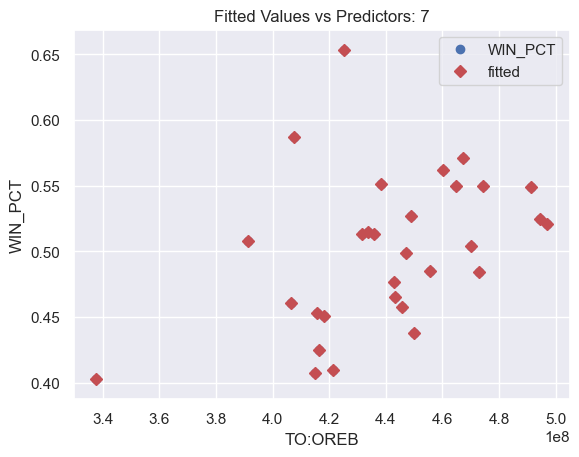

In [151]:
for i in range(len(formulas)):
    fitModel = smf.ols(formula = formulas[i], data = teams).fit()
    sm.graphics.plot_fit(fitModel, i)
    
    plt.title('Fitted Values vs Predictors: ' + str(i + 1))
    plt.show()

In [152]:
test = []

for i in range(500000):
    test.append(np.random.choice(clean_league.index))
    
test_data = clean_league.loc[test]
test_data = test_data.groupby(['TEAM_ID'])

games_played = test_data['WIN'].count()

test_teams = test_data.sum()
test_teams = test_teams.drop(columns = ['PLAYER_ID'])

test_teams.insert(loc = 1, column = 'LOSS', value = games_played - test_teams['WIN'])
test_teams.insert(loc = 2, column = 'TOTAL', value = games_played)
test_teams.insert(loc = 3, column = 'WIN_PCT', value = test_teams['WIN'] / games_played)

opponent_points = test_teams['PTS'] - test_teams['PLUS_MINUS']
test_teams.insert(loc = 5, column = 'OPP_PTS', value = opponent_points)

test_teams = test_teams.sort_values(by = ['WIN_PCT'], ascending = False)
test_teams

,WIN,LOSS,TOTAL,WIN_PCT,PTS,OPP_PTS,PLUS_MINUS,FGM,FGA,FG_PCT,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
TEAM_ID,,,,,,,,,,,,,,,,,,,,,
1610612756,8756,7817,16573,0.528329,141296.0,140269.0,1027.0,52844.0,112965.0,5827.142,...,30990.0,6253.867,14047.0,42523.0,56570.0,30378.0,9917.0,6502.0,19182.0,28378.0
1610612748,9415,8547,17962,0.524162,143260.0,130257.0,13003.0,53121.0,114624.0,6004.535,...,34521.0,5996.504,13854.0,44696.0,58550.0,30726.0,10699.0,7080.0,19528.0,29418.0
1610612742,8909,8208,17117,0.520477,138845.0,125165.0,13680.0,51207.0,112045.0,6167.733,...,31800.0,6430.142,14075.0,43464.0,57539.0,29460.0,9700.0,6415.0,17212.0,27712.0
1610612741,8390,7869,16259,0.516022,130772.0,129773.0,999.0,49013.0,110341.0,5551.730,...,30077.0,6058.673,14865.0,43024.0,57889.0,29627.0,9721.0,6429.0,18672.0,27165.0
1610612755,8294,8030,16324,0.508086,131017.0,141495.0,-10478.0,48810.0,108935.0,5606.344,...,31730.0,5979.891,14265.0,41749.0,56014.0,29091.0,10701.0,6400.0,18620.0,27384.0
1610612752,7936,7701,15637,0.507514,124928.0,140503.0,-15575.0,46284.0,103492.0,5349.004,...,29046.0,5629.476,13964.0,38952.0,52916.0,25403.0,9299.0,5389.0,17186.0,27163.0
1610612747,8787,8536,17323,0.507245,141366.0,138938.0,2428.0,52491.0,114606.0,5994.755,...,34707.0,6025.568,15069.0,44441.0,59510.0,30925.0,10237.0,7006.0,19407.0,28421.0
1610612744,8551,8311,16862,0.507117,144429.0,129682.0,14747.0,53709.0,115488.0,6233.789,...,31204.0,6194.244,14121.0,44073.0,58194.0,33806.0,11191.0,7285.0,19757.0,29374.0
1610612737,8522,8301,16823,0.506568,134479.0,145257.0,-10778.0,49787.0,110067.0,5809.070,...,31624.0,6272.295,13886.0,41715.0,55601.0,29773.0,10102.0,6339.0,18944.0,27648.0


In [153]:
dfTest = pd.DataFrame()
r2 = []

for form in formulas:
    model = smf.ols(formula = form, data = test_teams).fit()
    r2.append(model.rsquared_adj)
    
dfTest['Predictor'] = multiReg['Predictor']
dfTest['Training Score'] = multiReg['R-Squared']
dfTest['Test Score'] = r2

#dfTest = dfTest.fillna(1)
dfTest

,Predictor,Training Score,Test Score
0,PLUS_MINUS,0.952988,-0.034908
1,TO,0.959726,0.003293
2,OREB,0.963213,-0.055437
3,BLK,0.965880,0.304810
4,FT_PCT,0.969181,0.187193
5,FTA,0.969452,0.257686
6,STL,0.999994,0.979544


In [154]:
def Graph(x_Axis, dataframe):
    plt.figure(figsize=(12,6))

    plt.plot(x_Axis, dataframe['Training Score'], label='Training Data')
    plt.plot(x_Axis, dataframe['Test Score'], 'ro', label='Test Data')

    plt.vlines(
        x_Axis,
        ymin = dataframe['Training Score'], 
        ymax = dataframe['Test Score'],
        color = 'red',
        linestyle = 'dashed'
    )

    plt.legend()

Text(0, 0.5, 'R-Squared Score')

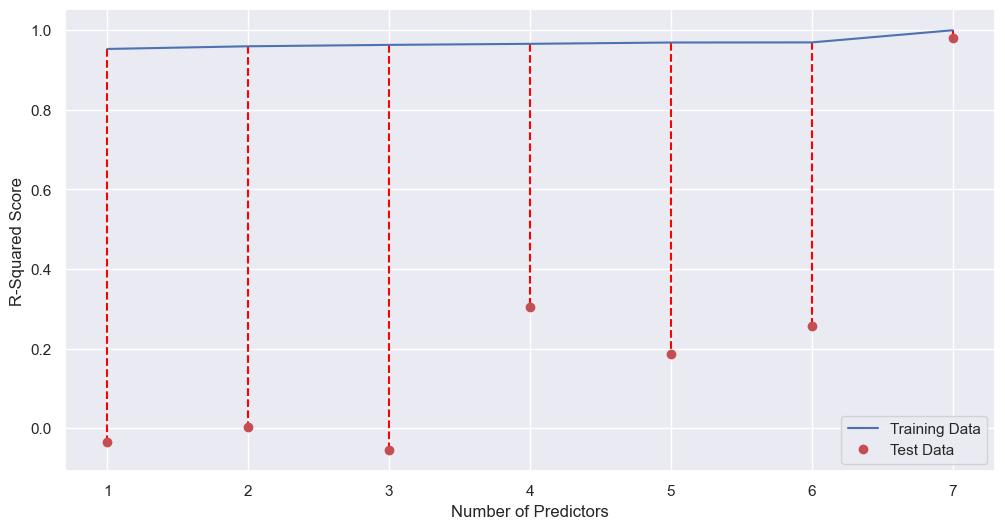

In [155]:
numPreds = range(1, len(dfTest) + 1)
Graph(numPreds, dfTest)

plt.xlabel('Number of Predictors')
plt.ylabel('R-Squared Score')

In [156]:
def LogModel(stat, mod, dataset):
    column = '0 + ' + stat
    X = patsy.dmatrix(column, data = dataset)

    return mod.fit(X, dataset['WIN']), X

In [157]:
def KNN(pred):
    k_scores = {}

    for k in range(1, train_set.shape[1]):
        if k % 2 != 0:
            clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
            knn_NBA, X = LogModel(pred, clf, train_set)
            k_scores[k] = knn_NBA.score(X, train_set['WIN'])

    df_knn = pd.DataFrame()
    df_knn['K'] = k_scores.keys()
    df_knn['Score'] = k_scores.values()

    df_knn = df_knn.sort_values('Score', ascending = False)
    return df_knn

In [158]:
train = []

for i in range(20000):
    train.append(np.random.choice(clean_league.index))

train_set = clean_league.loc[train]
train_set = train_set.set_index('PLAYER_ID')
train_set = train_set.drop(columns = ['TEAM_ID', 'MIN', 'COMMENT'])
train_set = train_set.iloc[:, 5:]
train_set = train_set.fillna(0)

train_set

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_ID,,,,,,,,,,,,,,,,,,,,
202738,1,28.0,21.0,11.0,23.0,0.478,2.0,7.0,0.286,4.0,5.0,0.800,0.0,4.0,4.0,6.0,1.0,2.0,1.0,2.0
2202,1,2.0,-15.0,1.0,6.0,0.167,0.0,2.0,0.000,0.0,0.0,0.000,1.0,4.0,5.0,3.0,0.0,0.0,1.0,2.0
101130,0,10.0,6.0,4.0,9.0,0.444,0.0,0.0,0.000,2.0,3.0,0.667,0.0,4.0,4.0,1.0,2.0,1.0,2.0,3.0
203991,1,16.0,2.0,7.0,9.0,0.778,0.0,0.0,0.000,2.0,2.0,1.000,4.0,8.0,12.0,1.0,1.0,2.0,0.0,3.0
1628390,1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627814,1,6.0,-24.0,3.0,7.0,0.429,0.0,1.0,0.000,0.0,1.0,0.000,0.0,2.0,2.0,4.0,1.0,1.0,5.0,4.0
1630245,1,14.0,18.0,6.0,7.0,0.857,2.0,3.0,0.667,0.0,0.0,0.000,0.0,4.0,4.0,10.0,3.0,0.0,1.0,2.0
201238,1,0.0,-1.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
lr = LogisticRegressionCV()
pred_score = {}

for stat in train_set.iloc[:, 1:]:
    default_mod, X = LogModel(stat, lr, train_set)
    pred_score[stat] = default_mod.score(X, train_set['WIN'])
    
logNBA = pd.DataFrame(pred_score.items(), columns = ['Predictor', 'Score'])
logNBA = logNBA.sort_values('Score', ascending = False)

logNBA

,Predictor,Score
12,DREB,0.50850
4,FG_PCT,0.50670
1,PLUS_MINUS,0.50665
7,FG3_PCT,0.50475
5,FG3M,0.50370
13,REB,0.50340
9,FTA,0.50260
0,PTS,0.50250
15,STL,0.50220
6,FG3A,0.50175


In [160]:
dfKNN = pd.DataFrame(columns = ['K', 'Score'])

for pred in logNBA['Predictor'][:3]:
    k_Model = KNN(pred)
    dfKNN.loc[dfKNN.shape[0]] = k_Model.iloc[0]
    
dfKNN.insert(0, 'Predictor', list(logNBA['Predictor'][:3]))
dfKNN['K'] = dfKNN['K'].astype('int')
dfKNN = dfKNN.sort_values('Score', ascending = False)

dfKNN

,Predictor,K,Score
2,PLUS_MINUS,3,0.51120
1,FG_PCT,9,0.51065
0,DREB,3,0.50480


In [161]:
test = []

for i in range(20000):
    test.append(np.random.choice(clean_league.index))
    
clean_test = clean_league.loc[test]
clean_test = clean_test.set_index('PLAYER_ID')
clean_test = clean_test.drop(columns = ['TEAM_ID', 'MIN', 'COMMENT'])
clean_test = clean_test.iloc[:, 5:]
clean_test = clean_test.fillna(0)

clean_test

,WIN,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_ID,,,,,,,,,,,,,,,,,,,,
2403,1,14.0,2.0,4.0,9.0,0.444,0.0,0.0,0.0,6.0,7.0,0.857,5.0,6.0,11.0,2.0,2.0,1.0,0.0,5.0
201144,0,14.0,-16.0,6.0,12.0,0.500,0.0,0.0,0.0,2.0,4.0,0.500,0.0,2.0,2.0,0.0,0.0,0.0,3.0,1.0
204014,0,0.0,-8.0,0.0,2.0,0.000,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2240,0,6.0,0.0,1.0,8.0,0.125,0.0,3.0,0.0,4.0,6.0,0.667,0.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0
200751,1,9.0,-7.0,3.0,9.0,0.333,1.0,5.0,0.2,2.0,2.0,1.000,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,1,15.0,2.0,5.0,17.0,0.294,0.0,4.0,0.0,5.0,5.0,1.000,2.0,3.0,5.0,4.0,0.0,0.0,2.0,3.0
202087,0,2.0,-2.0,1.0,5.0,0.200,0.0,1.0,0.0,0.0,0.0,0.000,0.0,8.0,8.0,5.0,2.0,0.0,4.0,1.0
200823,1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
knnTest = pd.DataFrame(dfKNN)
testScores = []

for i in dfKNN.index:
    k = dfKNN['K'].loc[i]
    pred = dfKNN['Predictor'].loc[i]
    
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_NBA, X = LogModel(pred, clf, clean_test)
    testScores.append(knn_NBA.score(X, clean_test['WIN']))
    
knnTest = knnTest.rename(columns={'Score': 'Training Score'})
knnTest['Test Score'] = testScores

knnTest

,Predictor,K,Training Score,Test Score
2,PLUS_MINUS,3,0.51120,0.5039
1,FG_PCT,9,0.51065,0.5008
0,DREB,3,0.50480,0.5001


Text(0, 0.5, 'KNN Score')

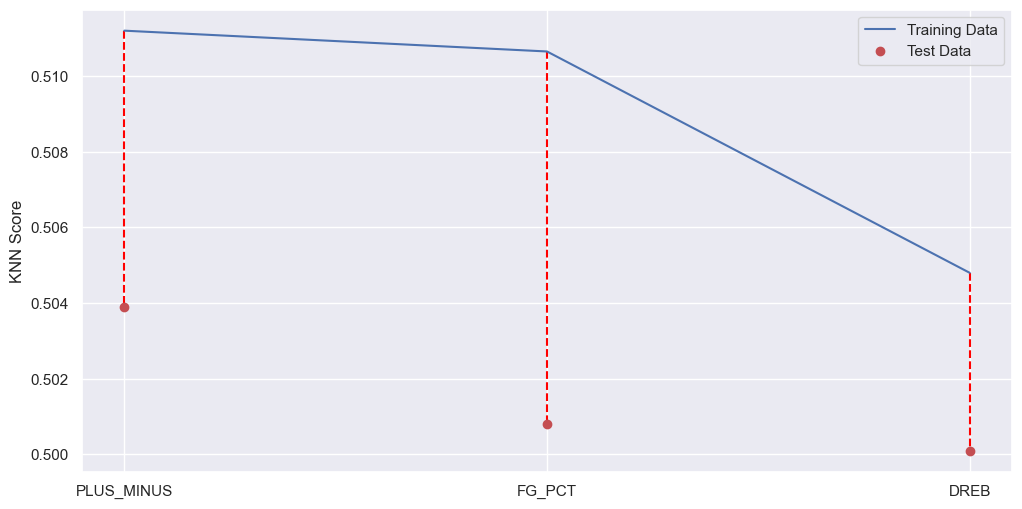

In [163]:
k_Preds = dfKNN['Predictor']
Graph(k_Preds, knnTest)
plt.ylabel('KNN Score')